# ***KURU FAS√úLYE SINIFLANDIRMA PROBLEMƒ∞ ***
(MULTI-CLASS CLASSIFICATION OF DRY BEANS)

**B√ñL√úM-1: VERƒ∞ √ñN ƒ∞≈ûLEME (PREPROCESSING)**

In [5]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")


!pip install scikit-learn
from sklearn.metrics import mean_squared_error,r2_score


from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


In [6]:
df_=pd.read_excel("/content/drive/MyDrive/Dry_Bean_Dataset.xlsx")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=df_.copy()
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [9]:
df.shape

(13611, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
df.describe([0.25,0.5,0.7,0.8,0.85,0.9,0.95,0.99]).T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           70%           80%  \
Area             36328.000000  44652.000000  55912.000000  67359.000000   
Perimeter          703.523500    794.941000    934.742000   1015.390000   
MajorAxisLength    253.303633    296.883367    363.802162    388.675385   
MinorAxisLength    175.848170    192.431733    207.439360    227.880576   
AspectRation         1.432307      1.551124      1.666802      1.757906   
Eccentricity         0.715928      0.764441      0.800037      0.822435   
ConvexArea       36714.500000  45178.000000  56838.000000  68457.000000   
EquivDiameter      215.068003    238.438026    266.813361    292.855156   
Extent               0.718634      0.759859      0.781866      0.791912   
Solidity             0.985670      0.988283      0.989650      0.990402   
roundness            0.832096      0.883157      0.910731      0.924219   
Compactness          0.762469      0.801277      0.825827      0.845496   
ShapeFactor1         0.005900      0.006645      0.007114      0.007468   
ShapeFactor2         0.001154      0.001694      0.002072      0.002285   
ShapeFactor3         0.581359      0.642044      0.681991      0.714864   
ShapeFactor4         0.993703      0.996386      0.997612      0.998143   

                          85%           90%           95%            99%  \
Area             72265.500000  78114.000000  89824.500000  186371.200000   
Perimeter         1051.681500   1093.858000   1181.124000    1654.072900   
MajorAxisLength    401.151175    416.862854    448.323944     628.302071   
MinorAxisLength    236.528533    246.685824    267.885177     387.354168   
AspectRation         1.830389      1.967724      2.082011       2.205338   
Eccentricity         0.837569      0.861238      0.877102       0.891284   
ConvexArea       73543.000000  79400.000000  91282.000000  188821.300000   
EquivDiameter      303.333632    315.369361    338.183538     487.129519   
Extent               0.797546      0.803600      0.812253       0.826043   
Solidity             0.990827      0.991366      0.992027       0.993007   
roundness            0.933078      0.945234      0.959254       0.973231   
Compactness          0.863736      0.888299      0.908990       0.936212   
ShapeFactor1         0.007682      0.007954      0.008305       0.008872   
ShapeFactor2         0.002403      0.002537      0.002724       0.003052   
ShapeFactor3         0.746041      0.789075      0.826262       0.876493   
ShapeFactor4         0.998411      0.998690      0.998992       0.999364   

                           max  
Area             254616.000000  
Perimeter          1985.370000  
MajorAxisLength     738.860153  
MinorAxisLength     460.198497  
AspectRation          2.430306  
Eccentricity          0.911423  
ConvexArea       263261.0000

In [12]:
df.duplicated().sum()

np.int64(68)

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

'Area' ve 'Perimeter' kolonlarƒ±na % 5 oranƒ±nda Missing Value eklendi.

In [15]:
for col in ['Area','Perimeter']:
    df.loc[df.sample(frac=0.05).index,col]=np.nan

'EquivDiameter' kolonuna %35 oranƒ±nda Missing Value eklendi.

In [16]:
for col in ['EquivDiameter']:
    df.loc[df.sample(frac=0.35).index,col]=np.nan

In [17]:
df.isna().sum()

Area                677
Perimeter           677
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea            0
EquivDiameter      4740
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

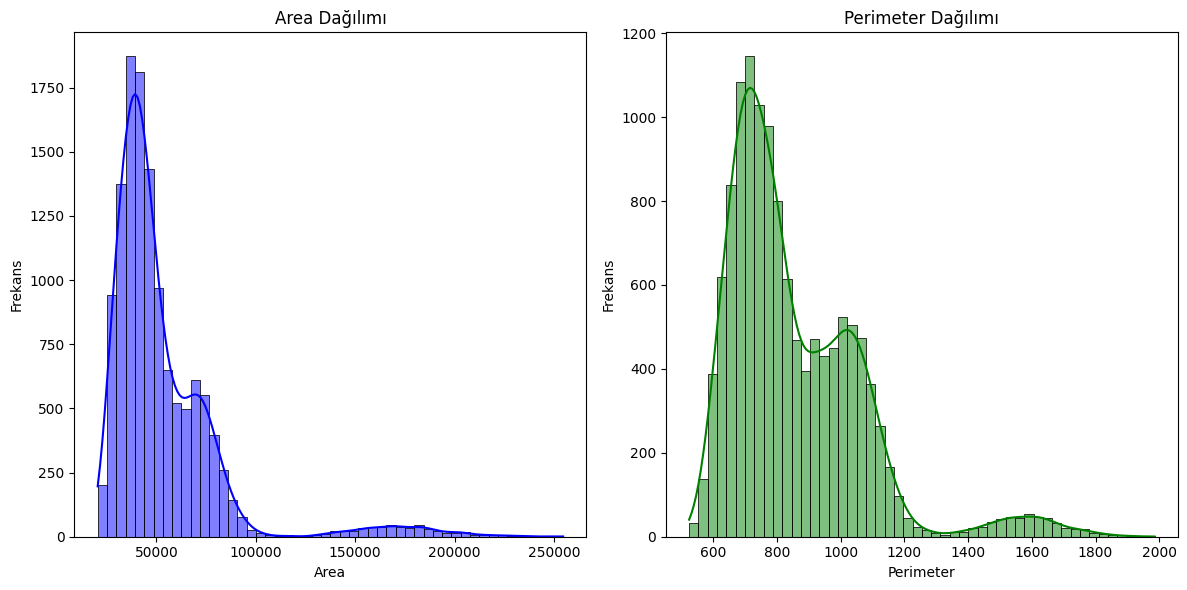

In [18]:
plt.figure(figsize=(12, 6))

# Area daƒüƒ±lƒ±mƒ±
plt.subplot(1, 2, 1)  # 1 satƒ±r, 2 s√ºtun, 1. grafik
sns.histplot(df['Area'], bins=50, kde=True, color='blue')
plt.title('Area Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Area')
plt.ylabel('Frekans')

# Perimeter daƒüƒ±lƒ±mƒ±
plt.subplot(1, 2, 2)  # 1 satƒ±r, 2 s√ºtun, 2. grafik
sns.histplot(df['Perimeter'], bins=50, kde=True, color='green')
plt.title('Perimeter Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Perimeter')
plt.ylabel('Frekans')

plt.tight_layout()  # Grafiklerin birbirine girmesini √∂nler
plt.show()

Her iki deƒüi≈üken daƒüƒ±lƒ±mƒ± da saƒüa √ßarpƒ±ktƒ±r. Aykƒ±rƒ± deƒüerlerin (outliers) ve √ßarpƒ±klƒ±ƒüƒ±n ortalamayƒ± yanƒ±ltƒ±cƒ± ≈üekilde etkilemesinden dolayƒ± mean ile deƒüil medyan ile doldurmayƒ± tercih etmek daha doƒüru bir yakla≈üƒ±mdƒ±r.

In [19]:
for col in ['Area', 'Perimeter']:
    median_value = df[col].median()  # S√ºtunun medyanƒ±nƒ± hesapla
    df[col].fillna(median_value, inplace=True)  # NaN'leri medyan ile doldur

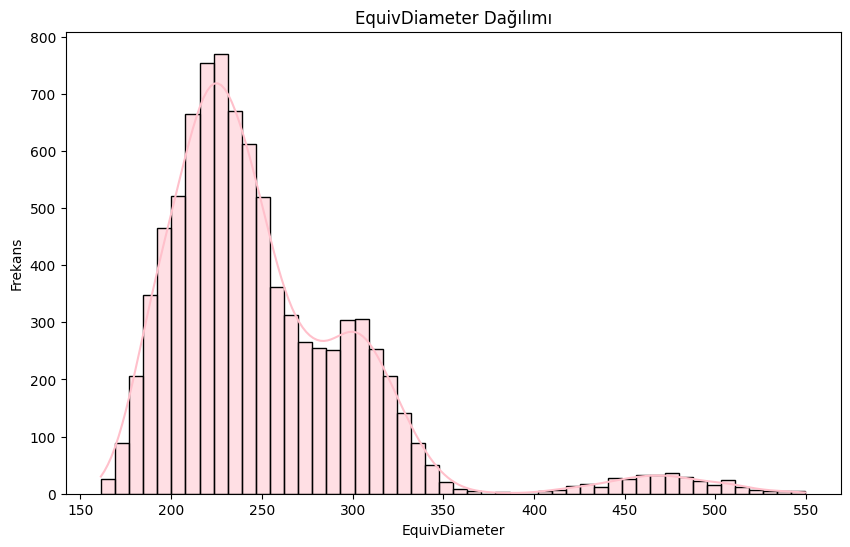

In [20]:

plt.figure(figsize=(10, 6))
sns.histplot(df['EquivDiameter'], bins=50, kde=True,color='pink')
plt.title('EquivDiameter Daƒüƒ±lƒ±mƒ±')
plt.xlabel('EquivDiameter')
plt.ylabel('Frekans')
plt.show()

In [21]:
df['EquivDiameter'] = df.groupby('Class')['EquivDiameter'].transform(
    lambda x: x.fillna(x.median()))

In [22]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

***AYKIRI DEƒûER ANALƒ∞Zƒ∞ - OUTLIER ANALYSIS ***

IQR y√∂ntemiyle outlier olan g√∂zlemler belirlendi ve sƒ±nƒ±r deƒüerlerine baskƒ±landƒ±.

In [23]:
def iqr_outlier_capping_all(df, plot=False):


    num_cols = df.select_dtypes(include='number').columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f"'{col}': {outlier_count} outlier baskƒ±lanacak.")

        if plot:
            plt.figure(figsize=(6, 1.5))
            sns.boxplot(x=df[col], color="skyblue")
            plt.title(f"{col} - Before Capping")
            plt.show()

        # Capping i≈ülemi
        df[col] = df[col].clip(lower, upper)

        if plot:
            plt.figure(figsize=(6, 1.5))
            sns.boxplot(x=df[col], color="lightgreen")
            plt.title(f"{col} - After Capping")
            plt.show()

    print("\n‚úÖ T√ºm sayƒ±sal kolonlar i√ßin baskƒ±lama tamamlandƒ±.")
    return df

'Area': 558 outlier baskƒ±lanacak.


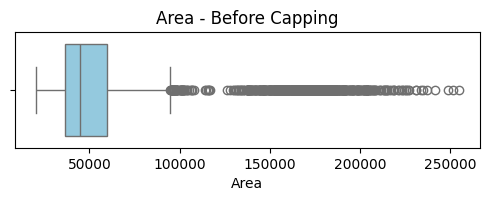

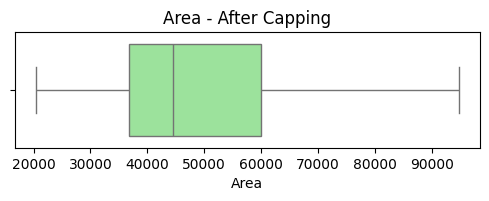

'Perimeter': 493 outlier baskƒ±lanacak.


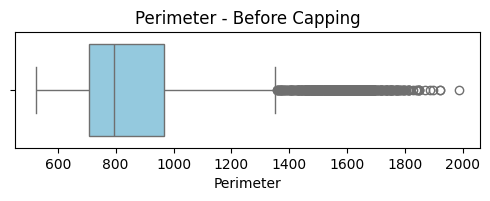

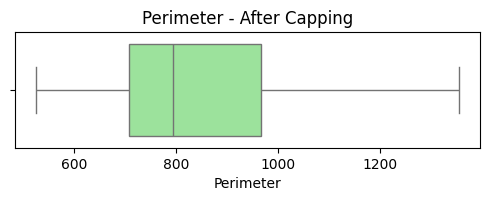

'MajorAxisLength': 379 outlier baskƒ±lanacak.


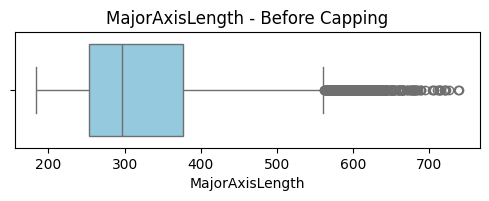

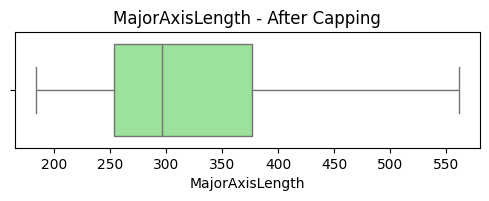

'MinorAxisLength': 567 outlier baskƒ±lanacak.


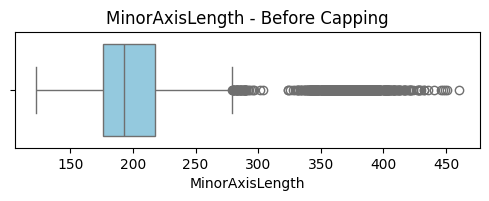

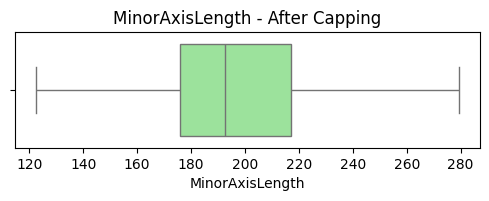

'AspectRation': 485 outlier baskƒ±lanacak.


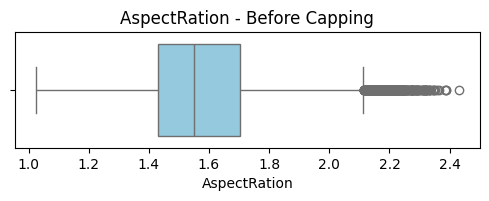

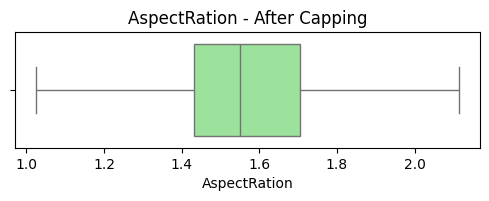

'Eccentricity': 833 outlier baskƒ±lanacak.


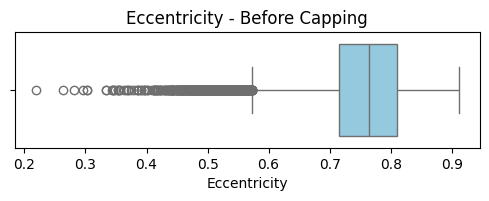

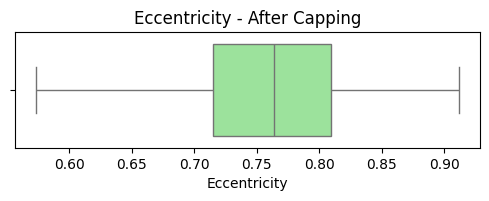

'ConvexArea': 549 outlier baskƒ±lanacak.


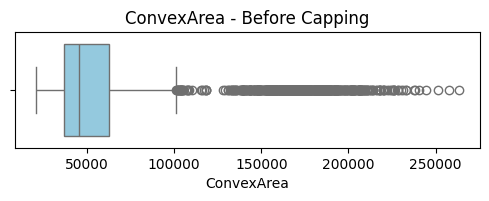

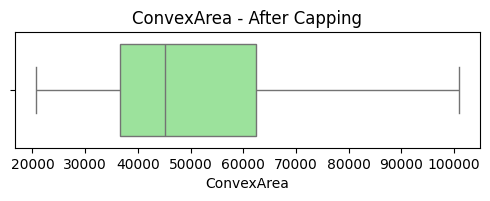

'EquivDiameter': 525 outlier baskƒ±lanacak.


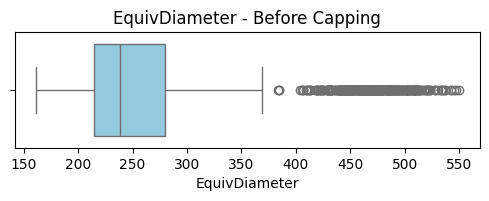

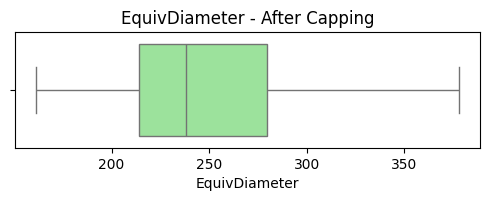

'Extent': 271 outlier baskƒ±lanacak.


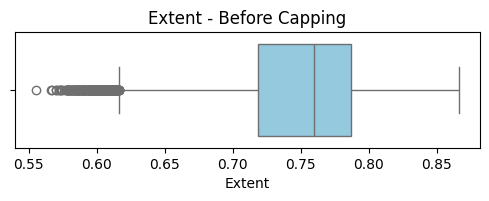

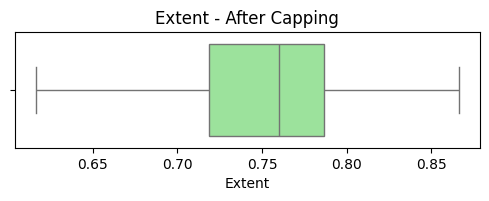

'Solidity': 774 outlier baskƒ±lanacak.


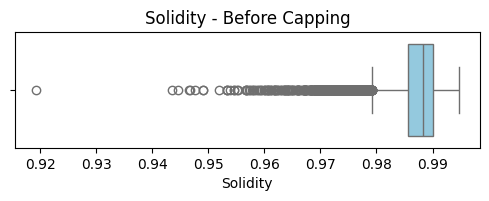

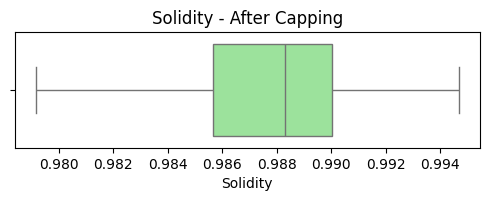

'roundness': 98 outlier baskƒ±lanacak.


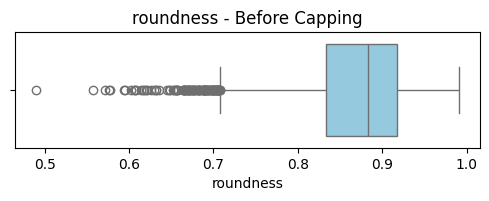

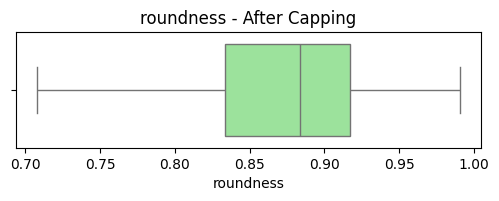

'Compactness': 124 outlier baskƒ±lanacak.


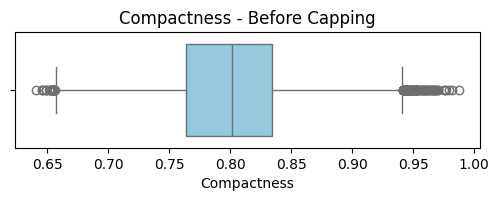

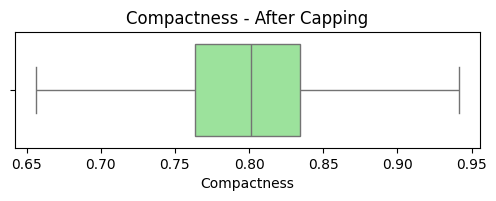

'ShapeFactor1': 533 outlier baskƒ±lanacak.


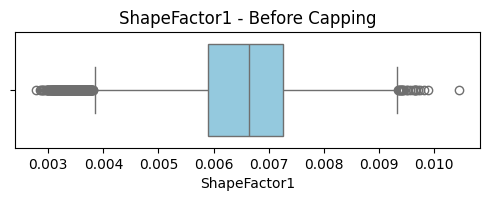

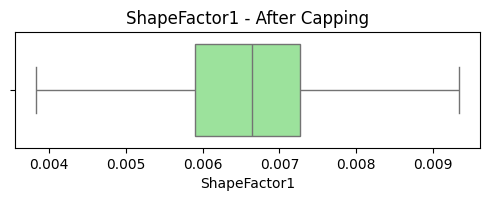

'ShapeFactor2': 0 outlier baskƒ±lanacak.


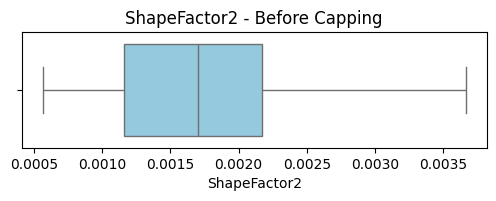

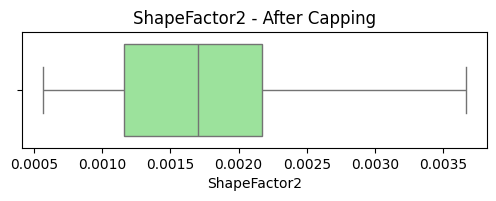

'ShapeFactor3': 202 outlier baskƒ±lanacak.


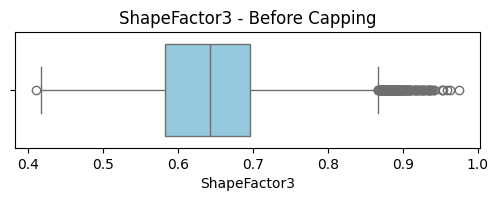

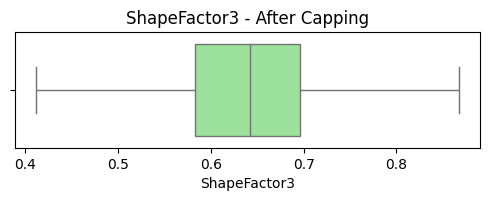

'ShapeFactor4': 760 outlier baskƒ±lanacak.


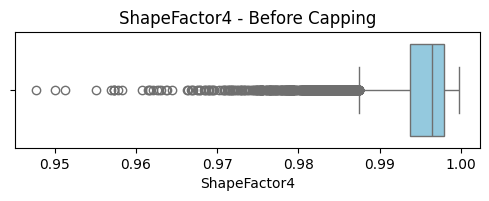

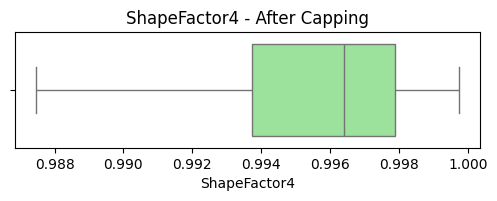


‚úÖ T√ºm sayƒ±sal kolonlar i√ßin baskƒ±lama tamamlandƒ±.


In [24]:
df = iqr_outlier_capping_all(df, plot=True)

**√ñL√áEKLEME ƒ∞≈ûLEMƒ∞**

In [25]:
# 1. Veriyi y√ºkle
X = df.drop('Class', axis=1)
y = df['Class']

# 2. Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print("X_scaled boyut:", X_scaled.shape)
print("y_encoded boyut:", y_encoded.shape)

X_scaled boyut: (13543, 16)
y_encoded boyut: (13543,)


Hedef deƒüi≈üken birden fazla sƒ±nƒ±fa sahip olduƒüu i√ßin Label Encoding yapƒ±ldƒ±. Sayƒ±sal √∂znitelikler ise aynƒ± √∂l√ßeƒüe gelmesi i√ßin Scaling i≈üleminden ge√ßirildi.

√ñl√ßekleme, √∂zellikleri aynƒ± √∂l√ßeƒüe getirir.
Her √∂zelliƒüi ortalama=0 ve standart sapma=1 olacak ≈üekilde d√∂n√º≈üt√ºr√ºr.
PCA √∂ncesi StandardScaler kullanmak, bile≈üenlerin ger√ßek varyansƒ± yansƒ±tmasƒ±nƒ± saƒülar.PCA, kovaryans matrisini kullanƒ±r. StandardScaler, kovaryans matrisinin doƒüru hesaplanmasƒ±nƒ± saƒülar.
√ñl√ßeklenmemi≈ü veride, PCA bile≈üenleri yanlƒ±≈ü √∂zelliklere odaklanabilir.Bu sebeple scaling i≈ülemi yapƒ±yoruz ve yine bahsettiƒüim sebeplerden dolayƒ± da StandardScaler kullanƒ±ldƒ±.

**PCA(Principal Compenent Analysis) ƒ∞LE BOYUT ƒ∞NDƒ∞RGEME**

In [26]:
pca_full = PCA().fit(X_scaled)

# Explained variance oranlarƒ±nƒ± hesapla
explained_variance = pca_full.explained_variance_ratio_

# Ortalamanƒ±n √ºzerindeki bile≈üenleri se√ß
n_components = sum(explained_variance > np.mean(explained_variance))
print(f"Se√ßilen bile≈üen sayƒ±sƒ±: {n_components}")
print(f"Bile≈üenlerin a√ßƒ±kladƒ±ƒüƒ± toplam varyans: {sum(explained_variance[:n_components]):.2%}")

Se√ßilen bile≈üen sayƒ±sƒ±: 3
Bile≈üenlerin a√ßƒ±kladƒ±ƒüƒ± toplam varyans: 89.72%


Orijinal veri setindeki deƒüi≈ükenler PCA ile 3 temel bile≈üene indirgendi ve bu bile≈üenler toplam varyansƒ±n %89.70'ni a√ßƒ±klƒ±yor. Bu, verideki ana kalƒ±plarƒ±n b√ºy√ºk √∂l√ß√ºde korunduƒüunu g√∂steriyor. √ñzellikle ilk iki bile≈üen (toplam ~%80 varyans) baskƒ±n etkiye sahipken, √º√ß√ºnc√º bile≈üen ek bilgi saƒülƒ±yor diyebiliriz.

In [27]:
# PCA'yƒ± se√ßilen bile≈üen sayƒ±sƒ±yla uygula
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# PCA uygulanmƒ±≈ü veriyi DataFrame'e √ßevir
pca_columns = [f"PC_{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=df.index)
pca_df['Class'] = y_encoded  # Hedef deƒüi≈ükeni ekle

# Sonu√ßlarƒ± g√∂ster
print("\nPCA uygulanmƒ±≈ü veri (ilk 5 satƒ±r):")
print(pca_df.head())


PCA uygulanmƒ±≈ü veri (ilk 5 satƒ±r):
       PC_1      PC_2      PC_3  Class
0  5.406434 -1.418442 -0.814344      5
1  5.077299 -2.078703 -2.121181      5
2  5.024653 -1.638408 -0.481999      5
3  3.977720 -1.872552 -3.607727      5
4  5.780441 -2.733514 -0.493545      5


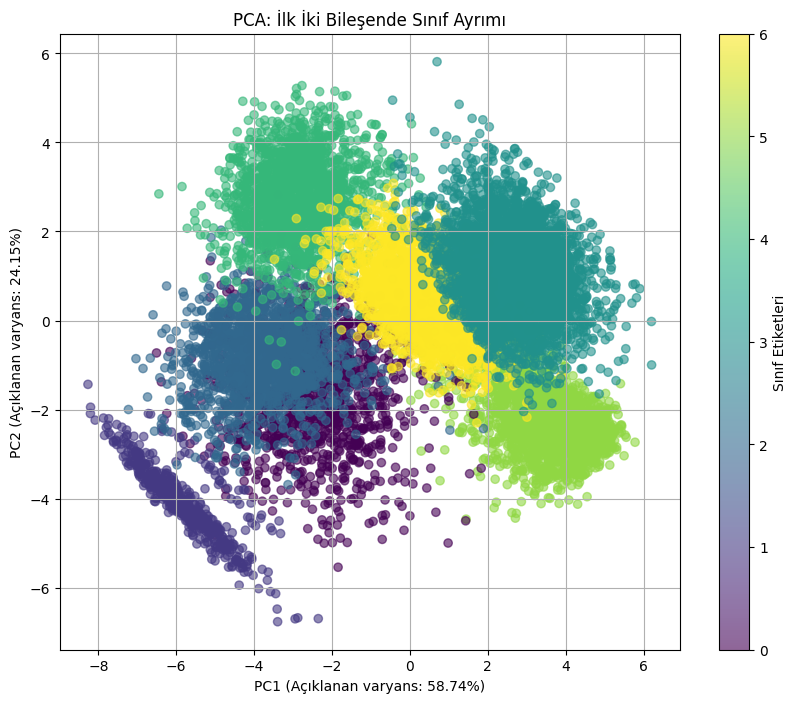

In [28]:
# ƒ∞lk 2 bile≈üen i√ßin PCA uygula (g√∂rselle≈ütirme ama√ßlƒ±)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# 2B grafik olu≈ütur
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_encoded, cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 (A√ßƒ±klanan varyans: {pca_2d.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (A√ßƒ±klanan varyans: {pca_2d.explained_variance_ratio_[1]:.2%})')
plt.title('PCA: ƒ∞lk ƒ∞ki Bile≈üende Sƒ±nƒ±f Ayrƒ±mƒ±')
plt.colorbar(scatter, label='Sƒ±nƒ±f Etiketleri')
plt.grid()
plt.show()

In [29]:

# PCA modeli
pca = PCA(n_components=3)
pca.fit(X_scaled)  # X_scaled: √ñl√ßeklendirilmi≈ü veri

# Bile≈üen y√ºkleri
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=X.columns)
print(loadings)

# Hangi deƒüi≈ükenler PC1'e en √ßok katkƒ± yapƒ±yor?
print("PC1 i√ßin √∂nemli deƒüi≈ükenler:", loadings['PC1'].abs().nlargest(3).index.tolist())
print("PC2 i√ßin √∂nemli deƒüi≈ükenler:", loadings['PC2'].abs().nlargest(3).index.tolist())
print("PC3 i√ßin √∂nemli deƒüi≈ükenler:", loadings['PC3'].abs().nlargest(3).index.tolist())

                      PC1       PC2       PC3
Area            -0.285041 -0.216368  0.045618
Perimeter       -0.295093 -0.181842  0.029088
MajorAxisLength -0.311392 -0.106801  0.123346
MinorAxisLength -0.216114 -0.375344 -0.028207
AspectRation    -0.237680  0.327420  0.173119
Eccentricity    -0.240497  0.321283  0.153846
ConvexArea      -0.290949 -0.222244  0.043302
EquivDiameter   -0.289344 -0.214496  0.049531
Extent           0.064773 -0.225288  0.244626
Solidity         0.158558 -0.071910  0.772343
roundness        0.260553 -0.180193  0.219569
Compactness      0.243563 -0.326166 -0.155582
ShapeFactor1     0.207578  0.381165 -0.009353
ShapeFactor2     0.312073 -0.102318 -0.143849
ShapeFactor3     0.244056 -0.325056 -0.152967
ShapeFactor4     0.220706 -0.076195  0.387486
PC1 i√ßin √∂nemli deƒüi≈ükenler: ['ShapeFactor2', 'MajorAxisLength', 'Perimeter']
PC2 i√ßin √∂nemli deƒüi≈ükenler: ['ShapeFactor1', 'MinorAxisLength', 'AspectRation']
PC3 i√ßin √∂nemli deƒüi≈ükenler: ['Solidity', 'Shap

Her bir bile≈üene en √ßok etki eden(en y√ºksek korelasyona sahip) √∂znitelikler belirlendi.

 **LDA(Linear Discriminant Analysis) ƒ∞LE BOYUT ƒ∞NDƒ∞RGEME**

In [30]:
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_encoded)


lda_df = pd.DataFrame(X_lda, columns=[f"LDA_{i+1}" for i in range(3)])
lda_df['Class'] = y_encoded

print("\nLDA uygulanmƒ±≈ü veri (ilk 5 satƒ±r):")
print(lda_df.head())


LDA uygulanmƒ±≈ü veri (ilk 5 satƒ±r):
      LDA_1     LDA_2     LDA_3  Class
0  3.573226 -4.064581 -0.041866      5
1  0.970907 -2.227342  3.082249      5
2  2.102313 -2.211735  0.756433      5
3  1.579527 -1.476440  1.214372      5
4  2.719409 -2.532184  3.993434      5


In [31]:
# LDA modeli
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X, y)  # X: √ñznitelikler, y: Sƒ±nƒ±f etiketleri


lda_components = lda.scalings_[:, :3]

# Katsayƒ± matrisi (√∂zniteliklerin bile≈üenlere aƒüƒ±rlƒ±klarƒ±)
coef_df = pd.DataFrame(lda_components, index=X.columns, columns=['LDA1', 'LDA2', 'LDA3'])
print(coef_df)

# En √∂nemli √∂znitelikler (mutlak deƒüerce b√ºy√ºk olanlar)
print("LDA1 i√ßin √∂nemli √∂znitelikler:", coef_df['LDA1'].abs().nlargest(3).index.tolist())
print("LDA2 i√ßin √∂nemli √∂znitelikler:", coef_df['LDA2'].abs().nlargest(3).index.tolist())
print("LDA3 i√ßin √∂nemli √∂znitelikler:", coef_df['LDA3'].abs().nlargest(3).index.tolist())

                        LDA1         LDA2          LDA3
Area                0.000012     0.000010  8.128861e-07
Perimeter          -0.000859    -0.000513 -2.820695e-04
MajorAxisLength    -0.234736    -0.128319 -5.859678e-02
MinorAxisLength    -0.064020     0.017402  4.788810e-02
AspectRation        3.300127    13.597145 -2.302854e+01
Eccentricity       -1.748406     1.931846  1.234170e+01
ConvexArea          0.000574     0.000253  1.332290e-04
EquivDiameter      -0.046116     0.054985  2.380777e-02
Extent             -1.015391     0.826677  1.837746e+00
Solidity           67.934928     7.316954 -3.969769e+01
roundness          -1.481276    -8.172238 -6.102057e+00
Compactness      -312.113738  -146.518013 -9.142069e+01
ShapeFactor1    -5011.792167 -1885.341081 -4.291706e+02
ShapeFactor2     2345.260907  1684.345557  2.308808e+03
ShapeFactor3      120.218933    69.287871 -7.602464e-01
ShapeFactor4        0.605736   -59.841678  1.496916e+02
LDA1 i√ßin √∂nemli √∂znitelikler: ['ShapeFactor1

ƒ∞lk 3 doƒürusal ayƒ±rƒ±cƒ± bile≈üene etki eden 3 √∂znitelik belirlenmi≈ütir.

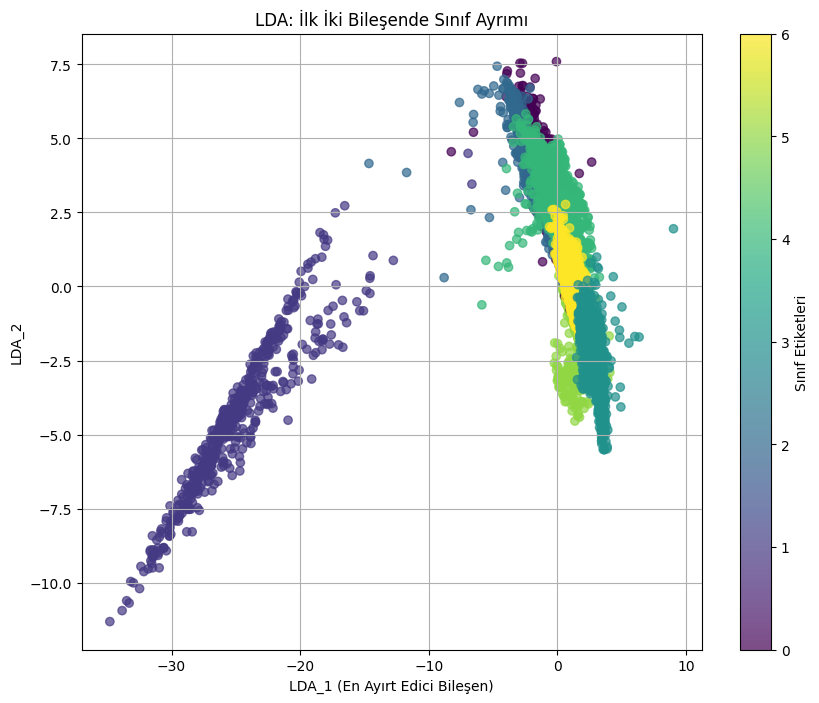

In [32]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.xlabel('LDA_1 (En Ayƒ±rt Edici Bile≈üen)')
plt.ylabel('LDA_2')
plt.title('LDA: ƒ∞lk ƒ∞ki Bile≈üende Sƒ±nƒ±f Ayrƒ±mƒ±')
plt.colorbar(scatter, label='Sƒ±nƒ±f Etiketleri')
plt.grid(True)
plt.show()

In [33]:
# LDA'nƒ±n sƒ±nƒ±flar arasƒ± ayrƒ±≈ütƒ±rma g√ºc√º
print("\nLDA Bile≈üenlerinin A√ßƒ±kladƒ±ƒüƒ± Varyans Oranƒ±:")
explained_variance_ratio = lda.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"LDA_{i+1}: {ratio:.2%}")


LDA Bile≈üenlerinin A√ßƒ±kladƒ±ƒüƒ± Varyans Oranƒ±:
LDA_1: 62.96%
LDA_2: 17.97%
LDA_3: 8.70%


LDA, PCA'den farklƒ± olarak sƒ±nƒ±f bilgisini kullanarak (supervised) boyut indirgeme yapar.

G√∂rselle≈ütirme, sƒ±nƒ±flarƒ±n LDA bile≈üenlerinde ne kadar iyi ayrƒ±≈ütƒ±ƒüƒ±nƒ± g√∂sterir.

explained_variance_ratio, her bile≈üenin sƒ±nƒ±flar arasƒ± ayrƒ±mƒ± ne kadar iyi a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂sterir.

**B√ñL√úM 3: MODELLEME VE DEƒûERLENDƒ∞RME**

Dƒ±≈ü d√∂ng√º (outer): Modelin performans deƒüerlendirmesi i√ßin kullanƒ±lƒ±r.

ƒ∞√ß d√∂ng√º (inner): Hiperparametre optimizasyonu i√ßindir. Farklƒ± bir random state (123) kullanarak, dƒ±≈ü d√∂ng√ºden baƒüƒ±msƒ±z bir veri b√∂l√ºnmesi yapƒ±lƒ±r. Bu, optimizasyonun daha g√ºvenilir olmasƒ±nƒ± saƒülar.

Stratified K-Fold Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± koruyarak b√∂lme yapar. Bu √∂zellikle dengesiz veri setlerinde √∂nemlidir.

Shuffle=True: Veriyi karƒ±≈ütƒ±rarak rastgeleliƒüi artƒ±rƒ±r

Dƒ±≈ü: 5-fold ‚Üí Model performansƒ±nƒ± daha g√ºvenilir √∂l√ßmek i√ßin.

ƒ∞√ß: 3-fold ‚Üí Hiperparametre optimizasyonunda hesaplama maliyetini d√º≈ü√ºrmek i√ßin

Nested CV'de dƒ±≈ü d√∂ng√ºn√ºn(Outer Loop)amacƒ±: Modelin genelleme performansƒ±nƒ± √∂l√ßmektir.
Veriyi 5 par√ßaya b√∂ler, her iterasyonda 4 par√ßa eƒüitim + 1 par√ßa test.

ƒ∞√ß d√∂ng√ºn√ºn amacƒ±; Hiperparametre optimizasyonu.
Dƒ±≈ü d√∂ng√ºn√ºn eƒüitim verisini 3-fold ile tekrar b√∂ler ve en iyi parametreleri se√ßer.

Performans metriklerinde F1 macro alƒ±nmasƒ±nƒ±n sebebi dengesiz sƒ±nƒ±f daƒüƒ±lƒ±mƒ±dƒ±r. T√ºm sƒ±nƒ±flarƒ± e≈üit aƒüƒ±rlƒ±kta deƒüerlendirir.

Performans Metrikleri ve Karma≈üƒ±klƒ±k Matrisi Sonu√ßlarƒ±na G√∂re;

EN ƒ∞Yƒ∞ MODEL
Veri Tipi: Ham Veri
Model: XGBoost
Ortalama Accuracy: 0.9490
Ortalama F1 (macro): 0.9564
En ƒ∞yi Parametreler: {'learning_rate': 0.1, 'n_estimators': 100} olarak belirlenmi≈ütir.


üîç Ham Veri - Logistic Regression deƒüerlendiriliyor...


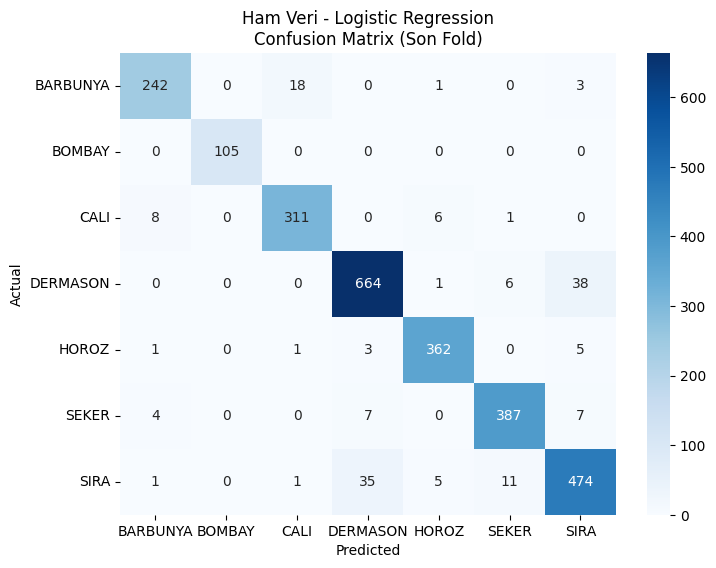


üîç Ham Veri - Decision Tree deƒüerlendiriliyor...


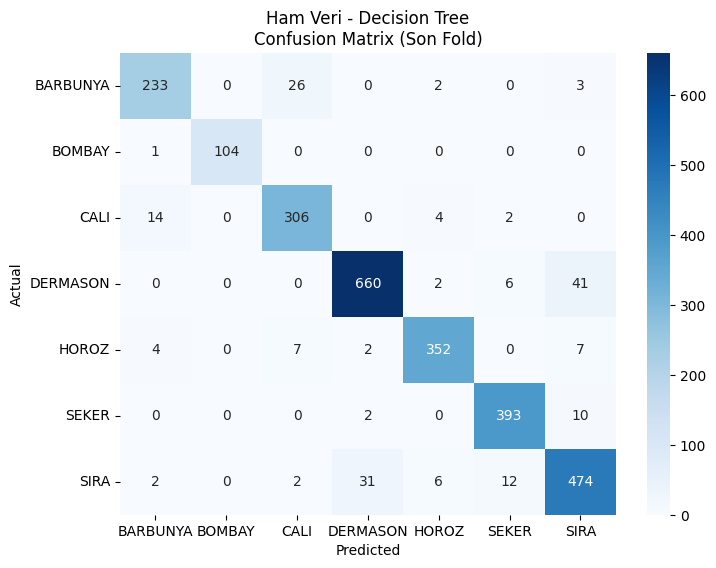


üîç Ham Veri - Random Forest deƒüerlendiriliyor...


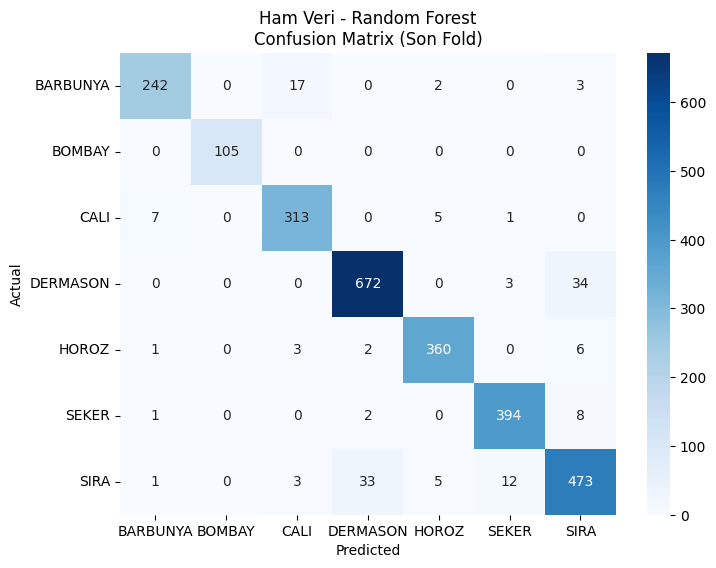


üîç Ham Veri - XGBoost deƒüerlendiriliyor...


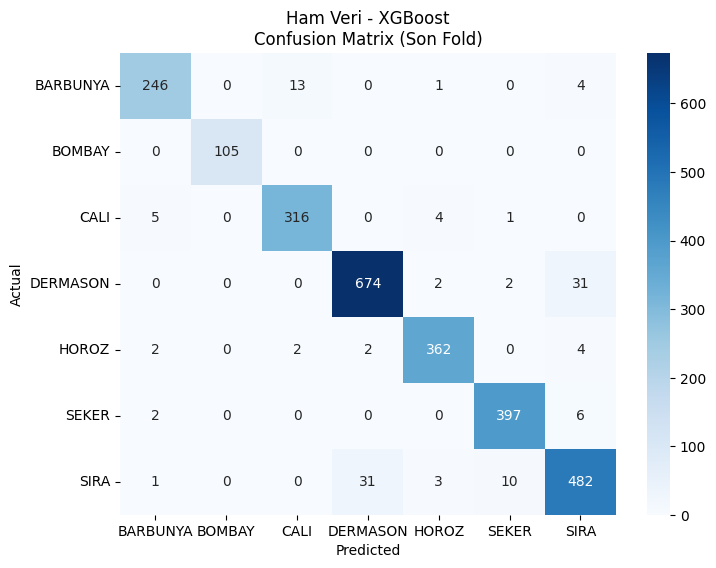


üîç Ham Veri - Naive Bayes deƒüerlendiriliyor...


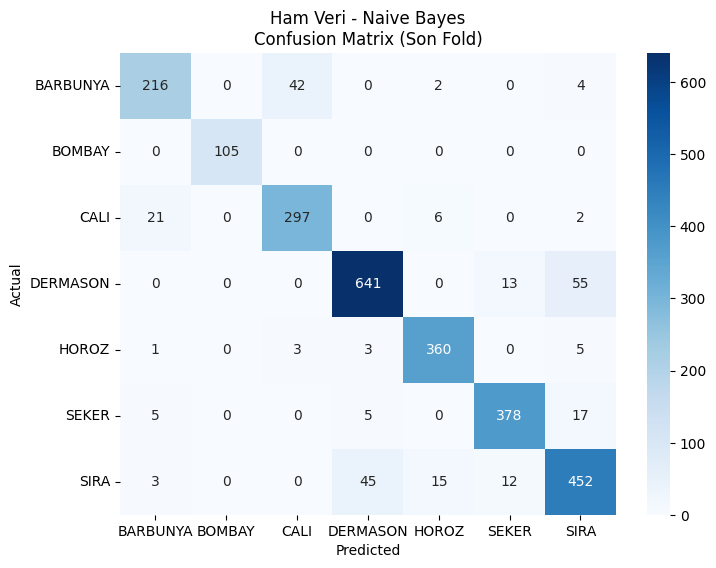


üîç PCA Veri - Logistic Regression deƒüerlendiriliyor...


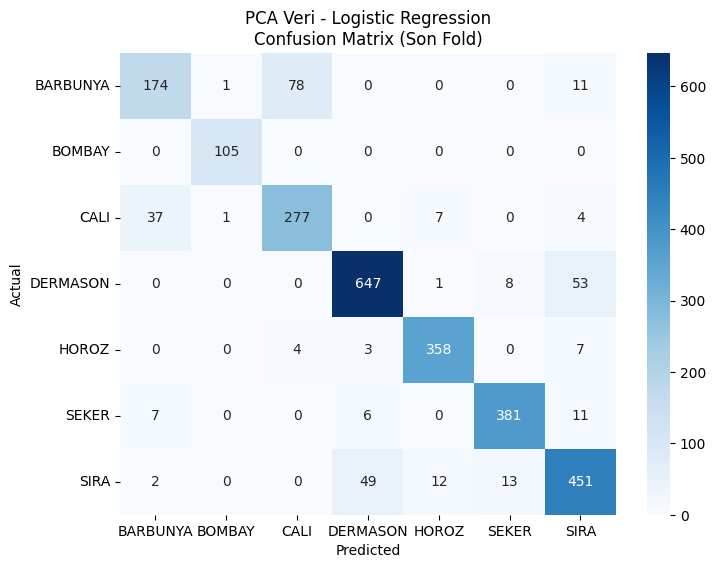


üîç PCA Veri - Decision Tree deƒüerlendiriliyor...


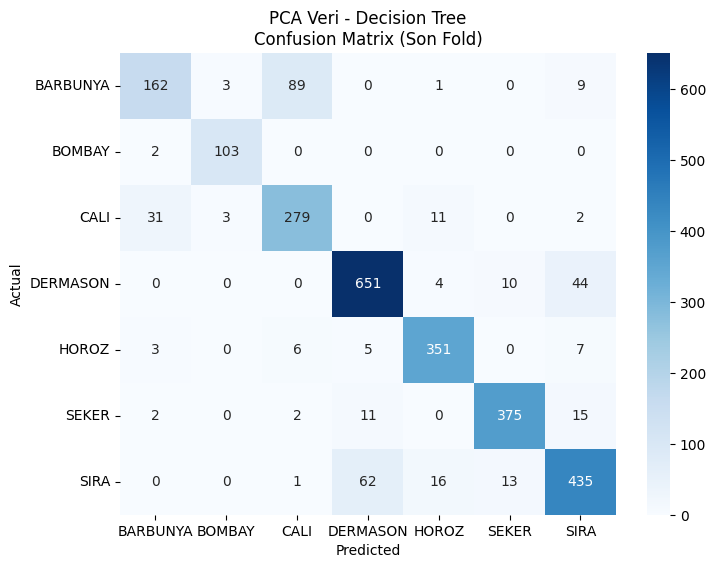


üîç PCA Veri - Random Forest deƒüerlendiriliyor...


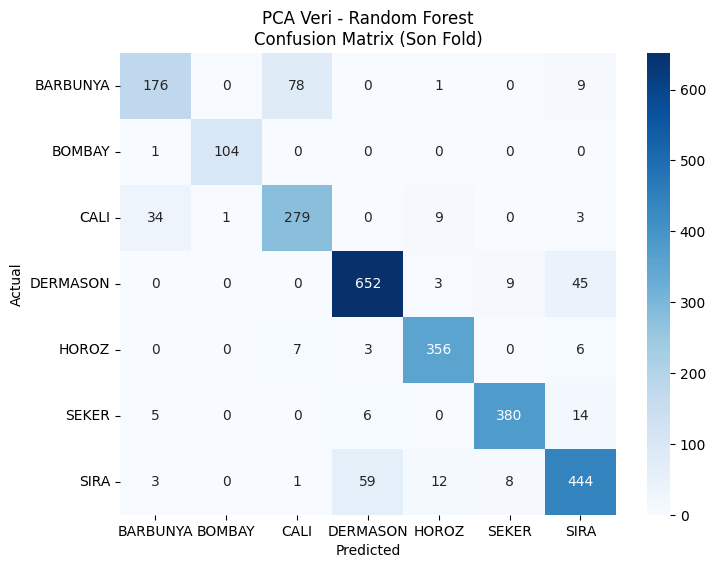


üîç PCA Veri - XGBoost deƒüerlendiriliyor...


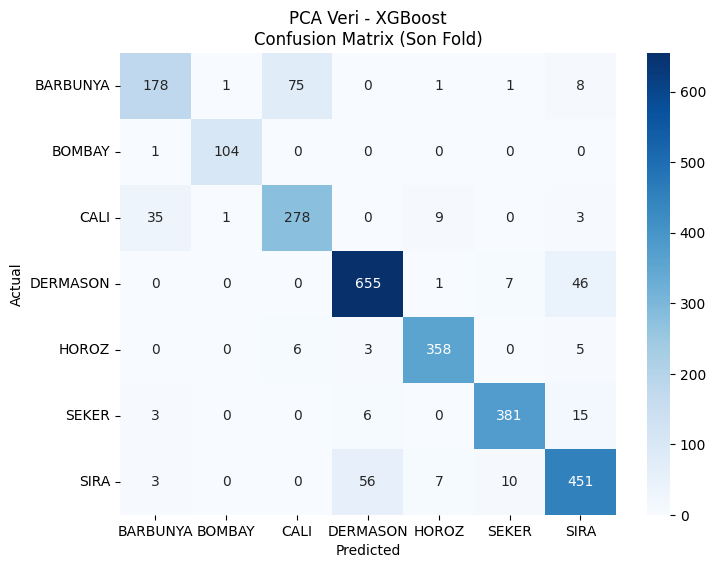


üîç PCA Veri - Naive Bayes deƒüerlendiriliyor...


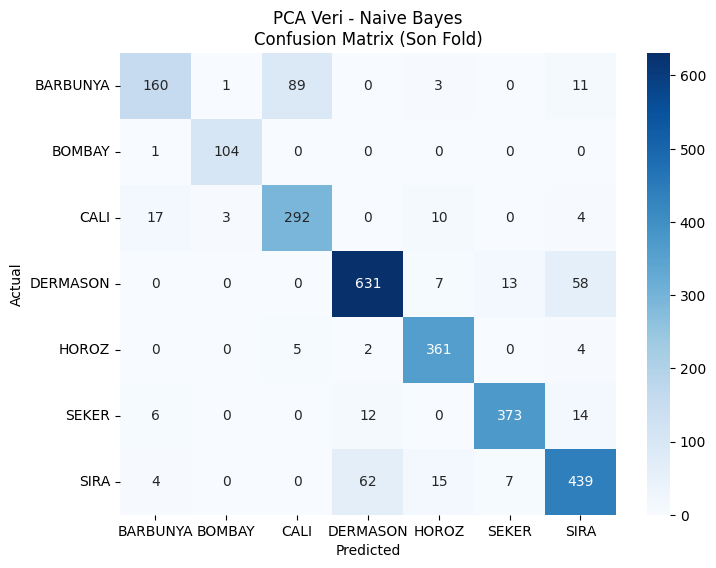


üîç LDA Veri - Logistic Regression deƒüerlendiriliyor...


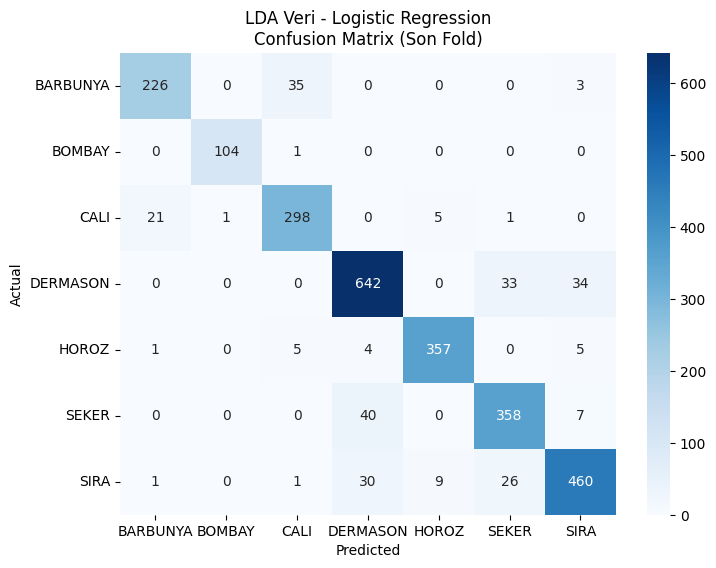


üîç LDA Veri - Decision Tree deƒüerlendiriliyor...


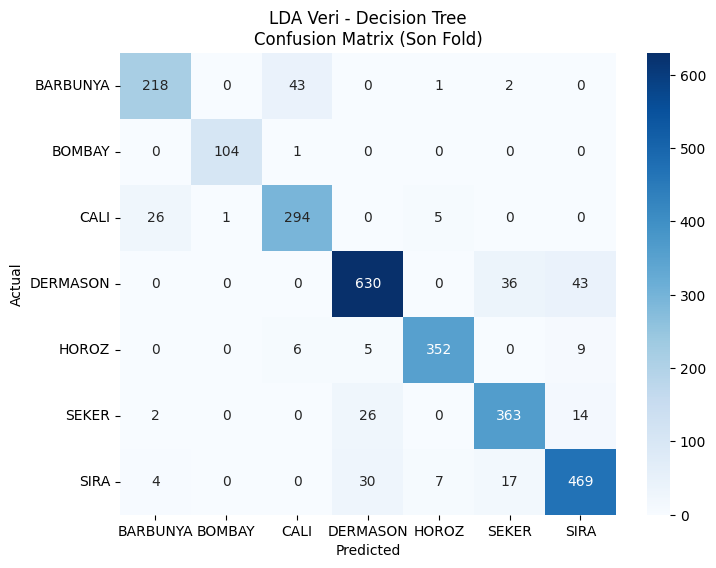


üîç LDA Veri - Random Forest deƒüerlendiriliyor...


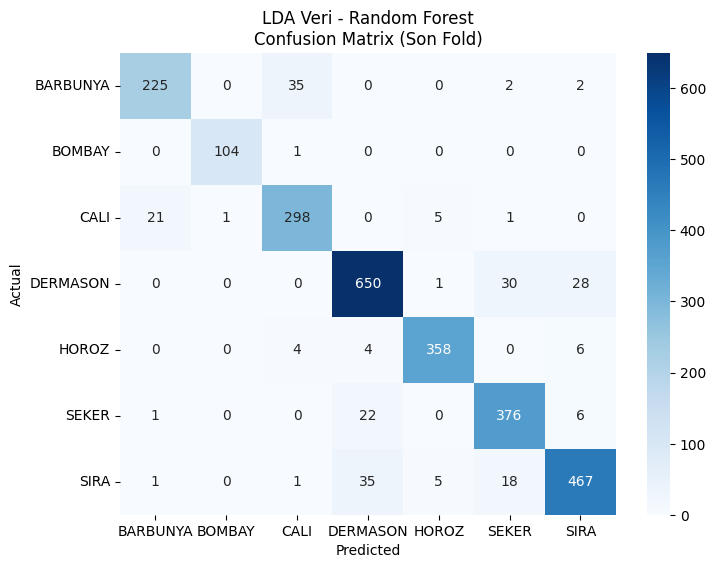


üîç LDA Veri - XGBoost deƒüerlendiriliyor...


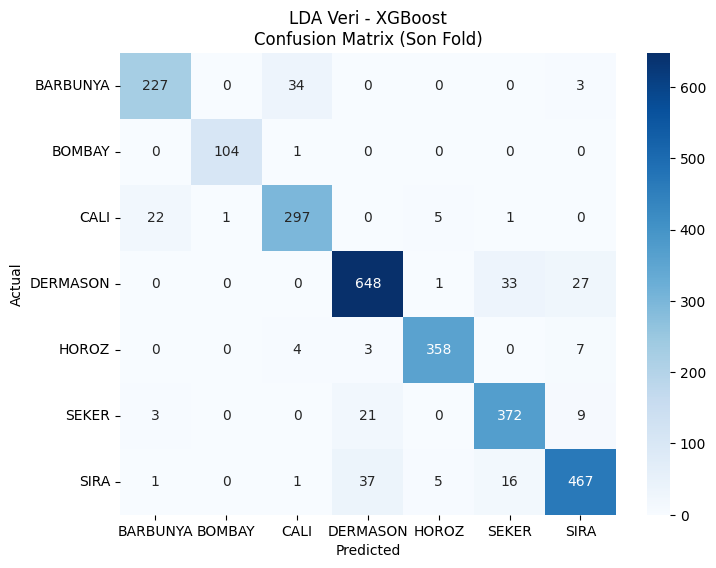


üîç LDA Veri - Naive Bayes deƒüerlendiriliyor...


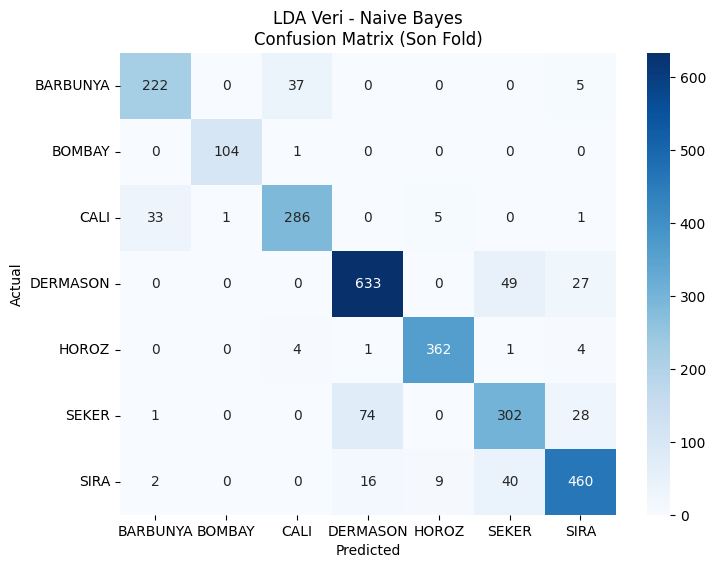


üèÜ EN ƒ∞Yƒ∞ PERFORMANSLAR:
                              Accuracy  Precision    Recall  F1_weighted  \
Data     Model                                                             
Ham Veri XGBoost              0.948978   0.949122  0.948978     0.948988   
         Random Forest        0.943735   0.943796  0.943735     0.943679   
         Logistic Regression  0.942627   0.942976  0.942627     0.942713   
         Decision Tree        0.931552   0.932176  0.931552     0.931656   
LDA Veri Random Forest        0.912576   0.913103  0.912576     0.912646   
         XGBoost              0.911689   0.912112  0.911689     0.911779   
Ham Veri Naive Bayes          0.909991   0.910902  0.909991     0.910072   
LDA Veri Logistic Regression  0.902459   0.902874  0.902459     0.902540   
         Decision Tree        0.898251   0.898604  0.898251     0.898256   
PCA Veri XGBoost              0.890202   0.890187  0.890202     0.889533   
         Random Forest        0.890201   0.890273  0.89020

In [34]:

# X_scaled: Ham veri (StandardScaler uygulanmƒ±≈ü)
# X_pca: PCA d√∂n√º≈üt√ºr√ºlm√º≈ü veri
# X_lda: LDA d√∂n√º≈üt√ºr√ºlm√º≈ü veri (n_components=3)
# y_encoded: Label encoded hedef deƒüi≈üken


random_states = {
    'outer': 42,
    'inner': 43
}

cv_settings = {
    'outer_cv': StratifiedKFold(n_splits=5, shuffle=True, random_state=random_states['outer']),
    'inner_cv': StratifiedKFold(n_splits=3, shuffle=True, random_state=random_states['inner'])
}


models_config = {
    "Logistic Regression": {
        "model": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
        "params": {'C': [0.1, 1, 10], 'penalty': ['l2']}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {'n_estimators': [50, 100], 'max_depth': [None, 10]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "params": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]}
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    }
}

data_types = {
    "Ham Veri": X_scaled,
    "PCA Veri": X_pca,
    "LDA Veri": X_lda
}


def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1_weighted': f1_score(y_true, y_pred, average='weighted'),
        'F1_macro': f1_score(y_true, y_pred, average='macro')
    }

# NESTED CV UYGULAMA

results = []

for data_name, X_data in data_types.items():
    for model_name, config in models_config.items():
        print(f"\nüîç {data_name} - {model_name} deƒüerlendiriliyor...")

        # Model pipeline
        model = config["model"]
        params = config["params"]


        grid = GridSearchCV(
            estimator=model,
            param_grid=params,
            cv=cv_settings['inner_cv'],
            scoring='accuracy',
            n_jobs=-1
        )

        # Dƒ±≈ü d√∂ng√º
        fold_results = []
        for fold, (train_idx, test_idx) in enumerate(cv_settings['outer_cv'].split(X_data, y_encoded)):
            X_train, X_test = X_data[train_idx], X_data[test_idx]
            y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]


            grid.fit(X_train, y_train)
            y_pred = grid.predict(X_test)


            metrics = calculate_metrics(y_test, y_pred)
            metrics.update({
                'Data': data_name,
                'Model': model_name,
                'Fold': fold + 1,
                'Best_Params': str(grid.best_params_)
            })
            fold_results.append(metrics)

            # Son fold i√ßin confusion matrix
            if fold == cv_settings['outer_cv'].n_splits - 1:
                cm = confusion_matrix(y_test, y_pred)
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=le.classes_,
                            yticklabels=le.classes_)
                plt.title(f'{data_name} - {model_name}\nConfusion Matrix (Son Fold)')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

        # Ortalama metrikler
        avg_metrics = pd.DataFrame(fold_results).mean(numeric_only=True).to_dict()
        avg_metrics.update({
            'Data': data_name,
            'Model': model_name,
            'Best_Params': fold_results[-1]['Best_Params']
        })
        results.append(avg_metrics)


results_df = pd.DataFrame(results)


print("\nüèÜ EN ƒ∞Yƒ∞ PERFORMANSLAR:")
final_results = results_df.groupby(['Data', 'Model']).agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1_weighted': 'mean',
    'F1_macro': 'mean'
}).sort_values(by='F1_weighted', ascending=False)

pd.set_option('display.max_columns', None)
print(final_results)


best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\n‚≠ê EN ƒ∞Yƒ∞ MODEL:")
print(f"Veri Tipi: {best_model['Data']}")
print(f"Model: {best_model['Model']}")
print(f"Ortalama Accuracy: {best_model['Accuracy']:.4f}")
print(f"Ortalama F1 (macro): {best_model['F1_macro']:.4f}")
print(f"En ƒ∞yi Parametreler: {best_model['Best_Params']}")

Nested CV'nin en iyi dƒ±≈ü d√∂ng√º sonucuna g√∂re her sƒ±nƒ±f i√ßin ayrƒ± ayrƒ± ROC eƒürilerini OvA(One-vs-All) y√∂ntemiyle √ßizen ve her bir sƒ±nƒ±fa ait AUC deƒüerleri g√∂sterildi. OvA, √ßok sƒ±nƒ±flƒ± problemleri ikili sƒ±nƒ±flandƒ±rƒ±cƒ±lara indirger. Sonu√ßlardan g√∂r√ºld√ºƒü√º √ºzere AUC skorlarƒ±nƒ±n %95-100 arasƒ± olmasƒ± modelin sƒ±nƒ±flarƒ± √ßok iyi ayƒ±rt ettiƒüini g√∂stermektedir.

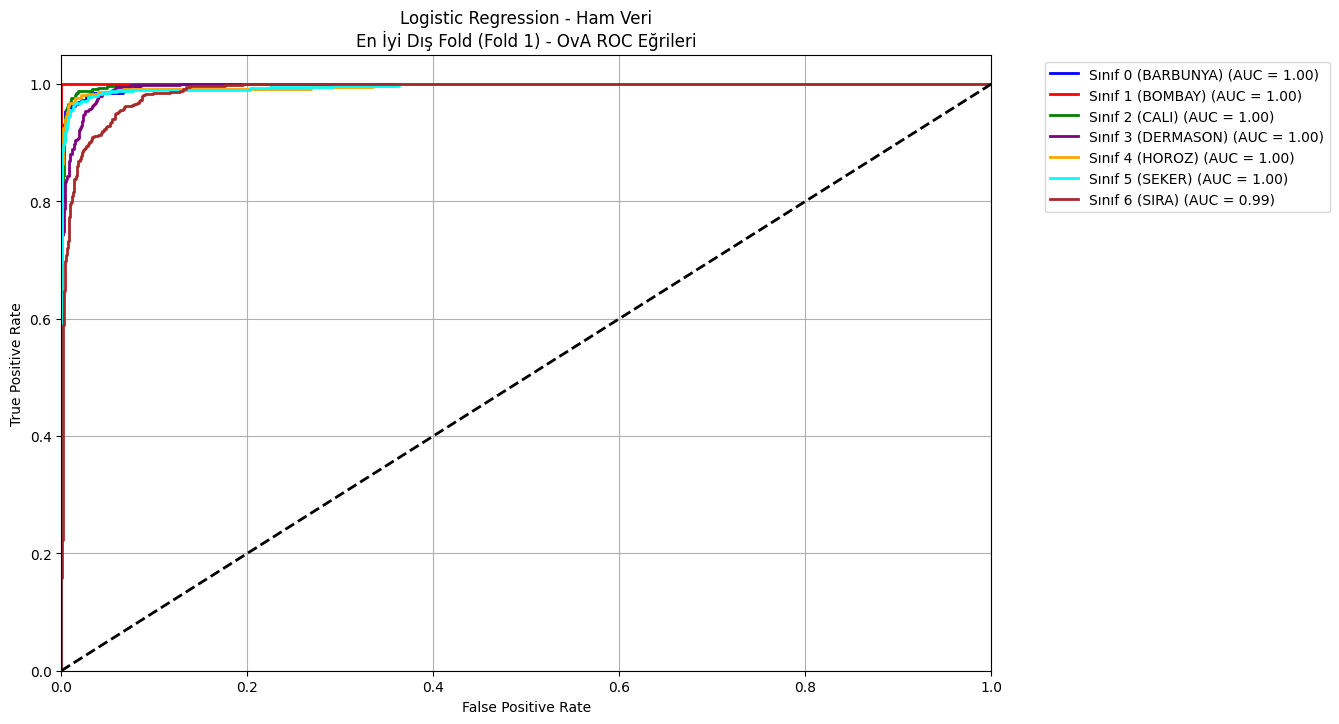


Logistic Regression (Ham Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9980
BOMBAY: 1.0000
CALI: 0.9984
DERMASON: 0.9957
HOROZ: 0.9961
SEKER: 0.9958
SIRA: 0.9891
Macro Avg AUC: 0.9962


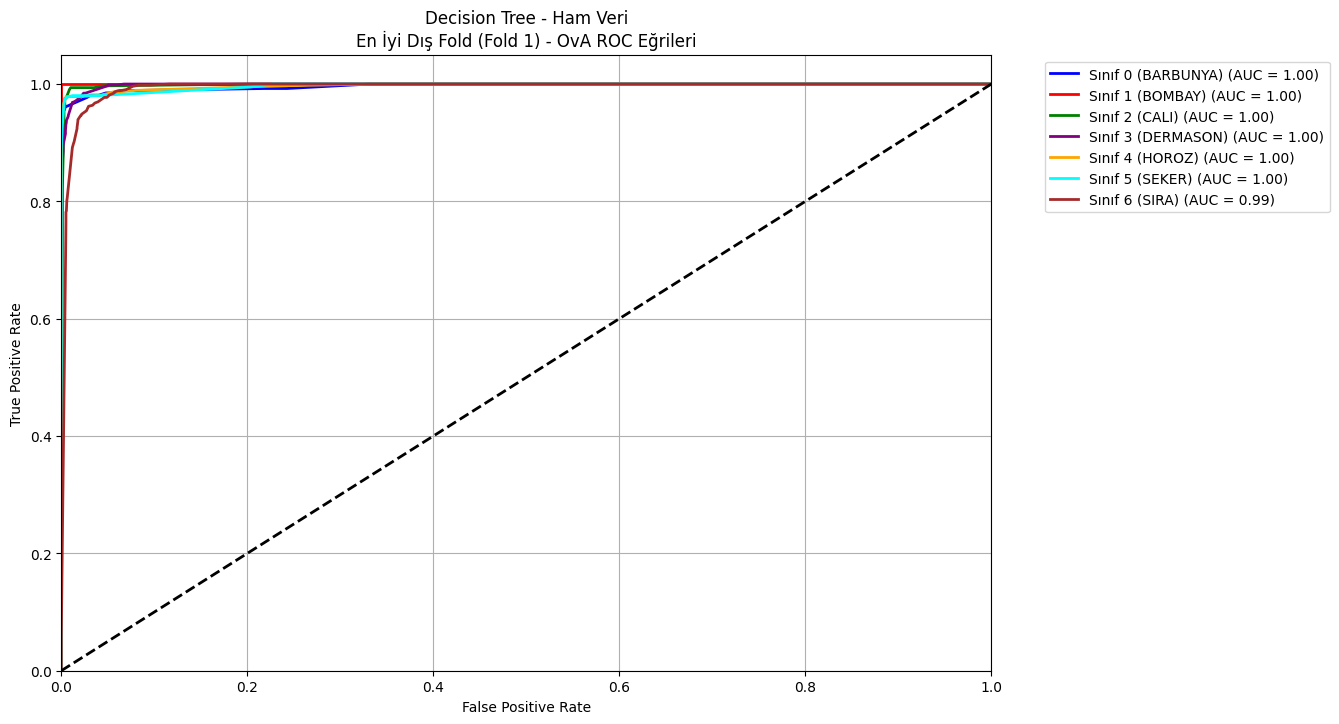


Decision Tree (Ham Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9965
BOMBAY: 1.0000
CALI: 0.9985
DERMASON: 0.9985
HOROZ: 0.9973
SEKER: 0.9970
SIRA: 0.9938
Macro Avg AUC: 0.9974


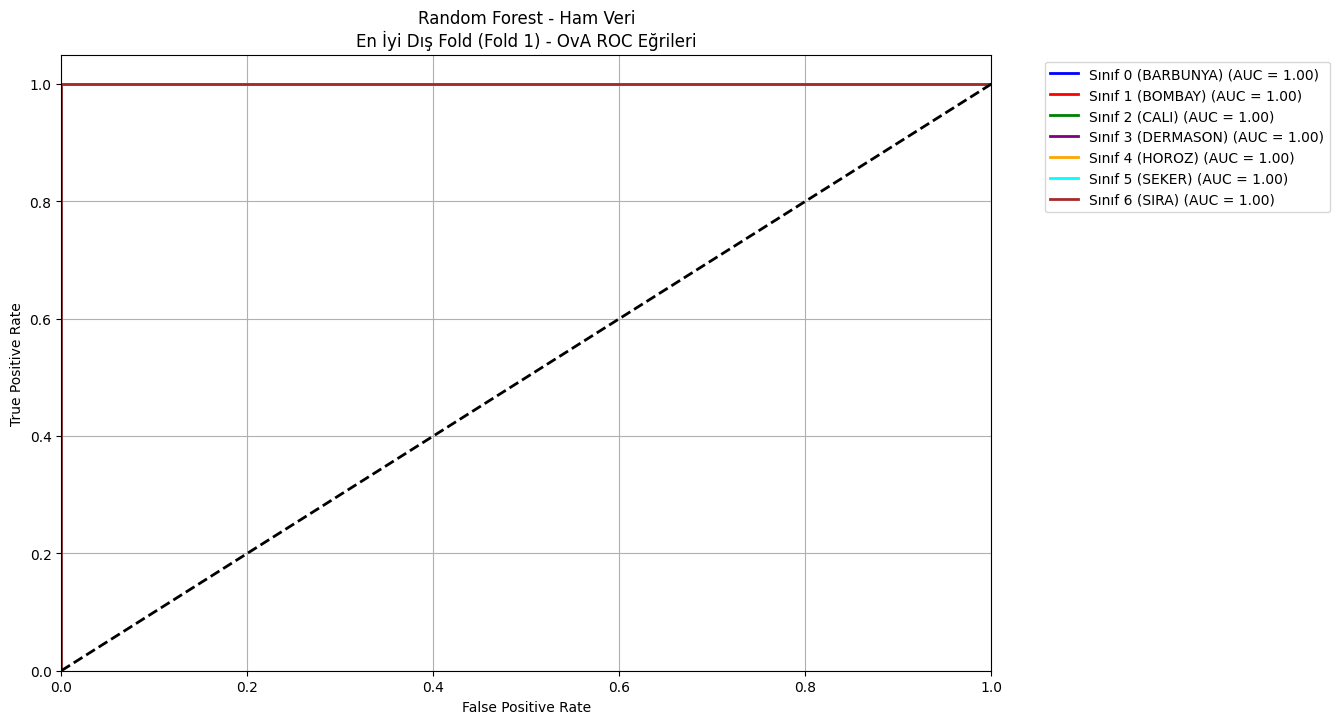


Random Forest (Ham Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 1.0000
BOMBAY: 1.0000
CALI: 1.0000
DERMASON: 1.0000
HOROZ: 1.0000
SEKER: 1.0000
SIRA: 1.0000
Macro Avg AUC: 1.0000


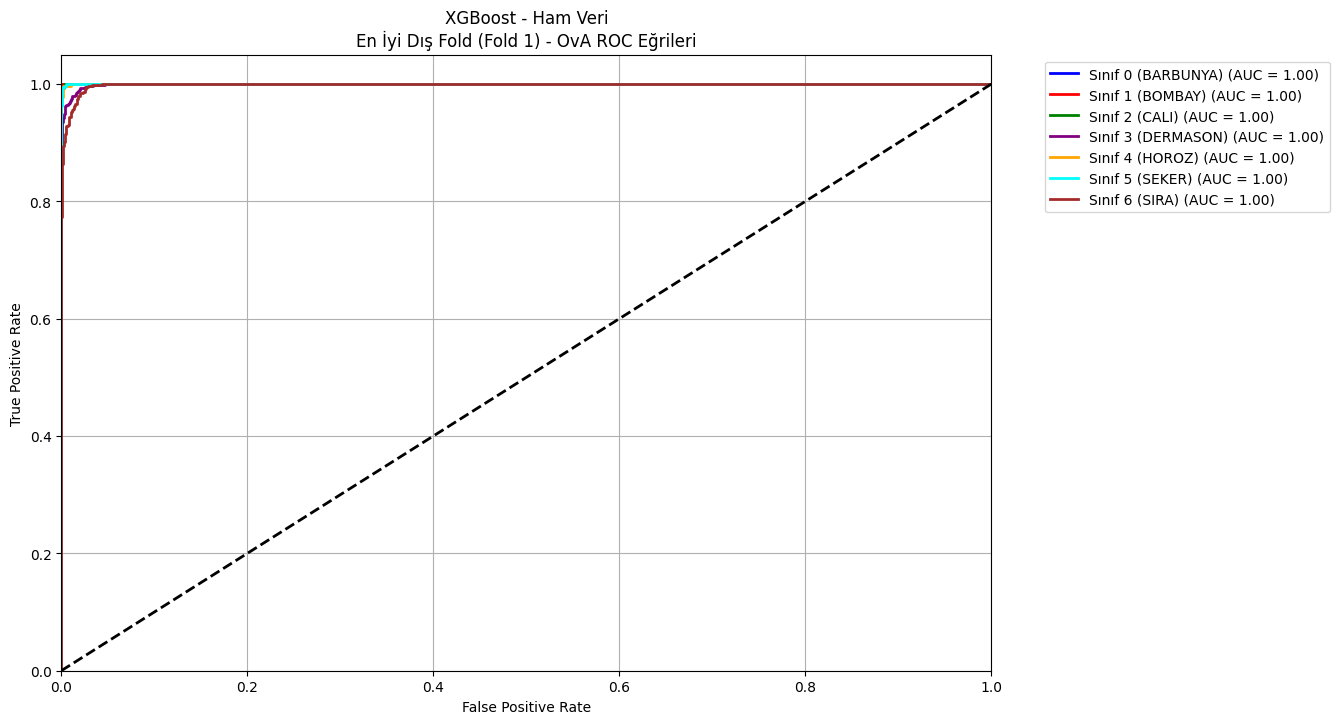


XGBoost (Ham Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 1.0000
BOMBAY: 1.0000
CALI: 1.0000
DERMASON: 0.9993
HOROZ: 0.9999
SEKER: 0.9999
SIRA: 0.9986
Macro Avg AUC: 0.9997


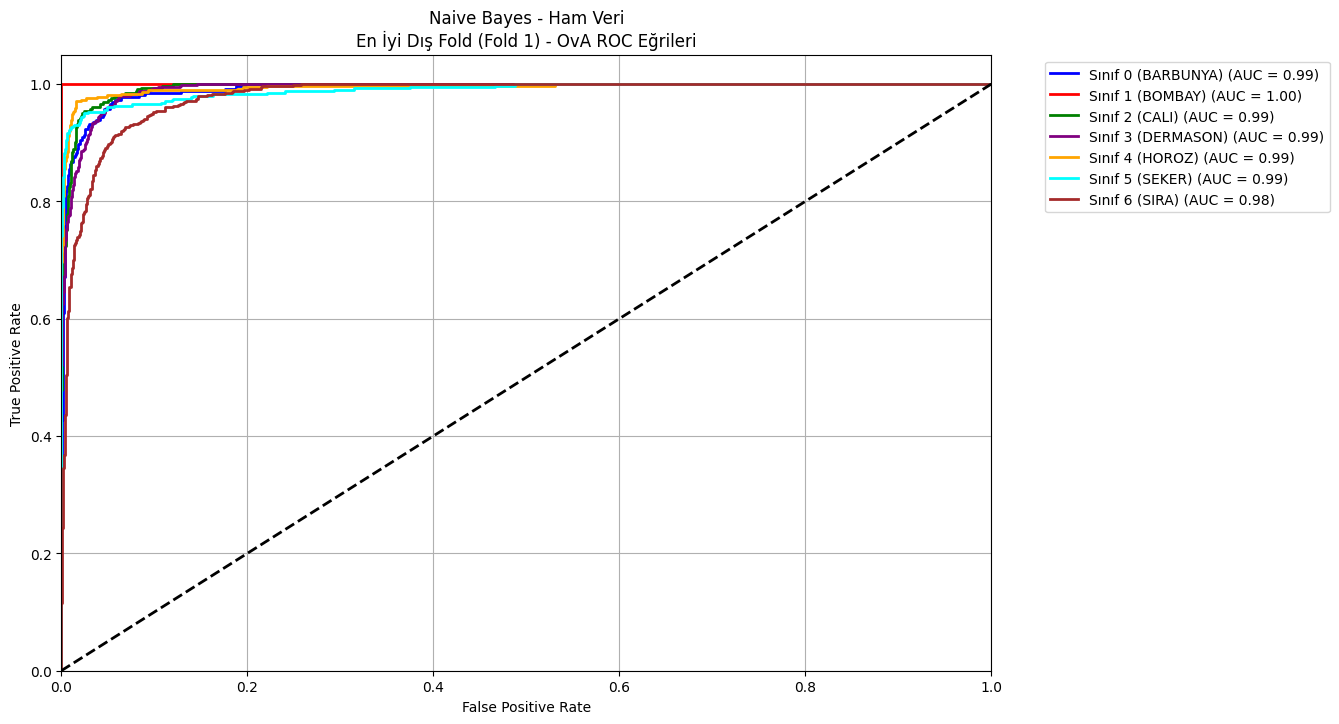


Naive Bayes (Ham Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9916
BOMBAY: 1.0000
CALI: 0.9943
DERMASON: 0.9921
HOROZ: 0.9946
SEKER: 0.9901
SIRA: 0.9803
Macro Avg AUC: 0.9919


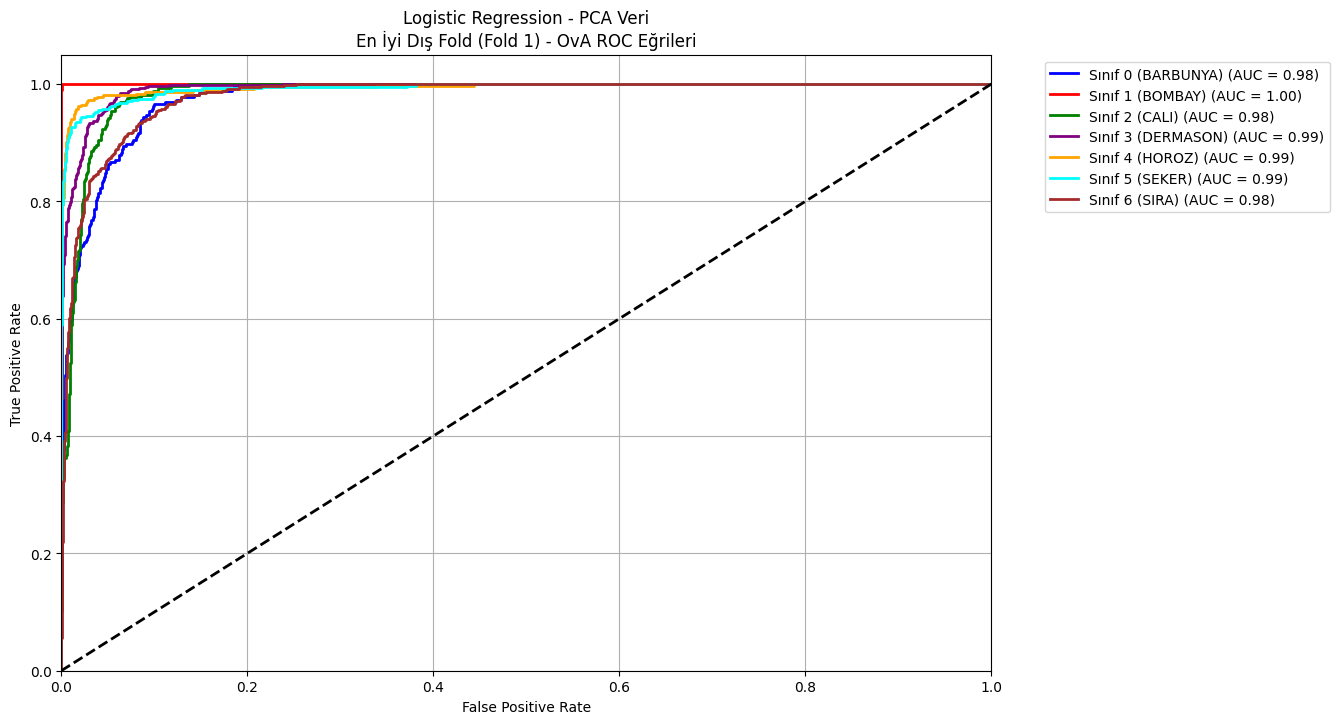


Logistic Regression (PCA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9783
BOMBAY: 1.0000
CALI: 0.9848
DERMASON: 0.9925
HOROZ: 0.9943
SEKER: 0.9930
SIRA: 0.9798
Macro Avg AUC: 0.9890


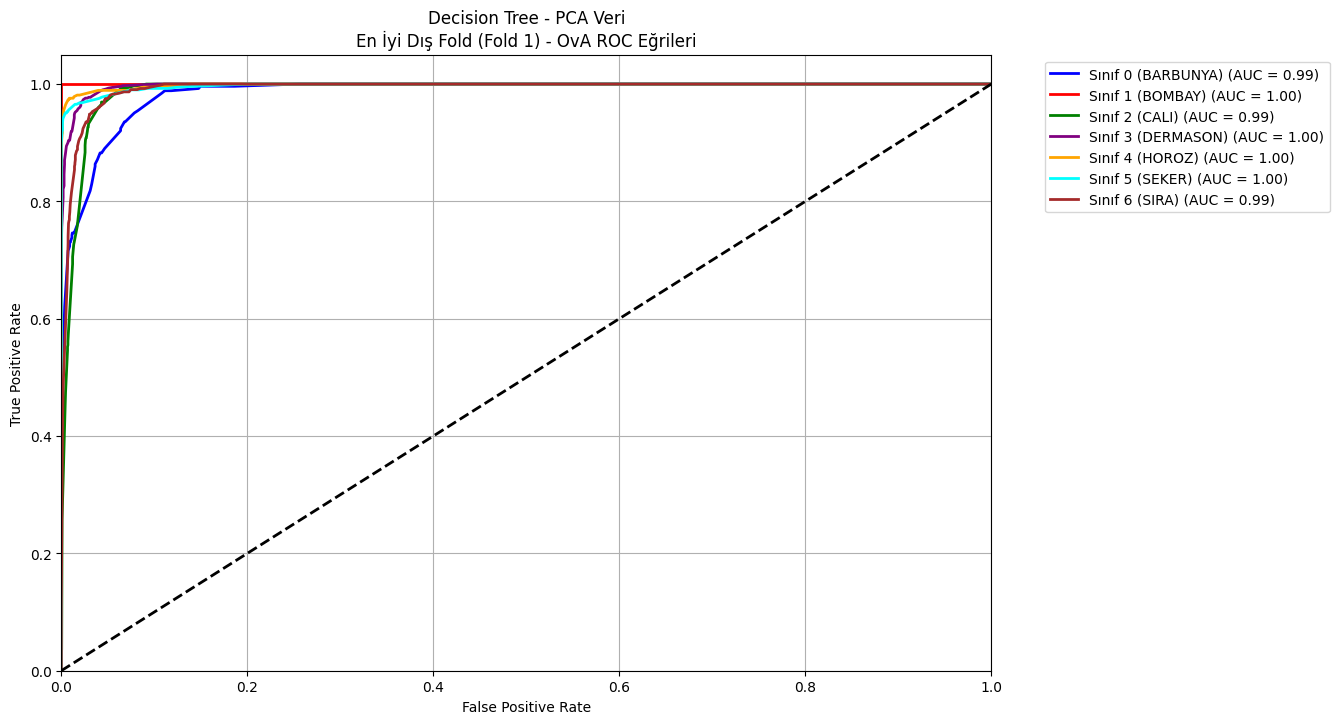


Decision Tree (PCA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9853
BOMBAY: 1.0000
CALI: 0.9894
DERMASON: 0.9974
HOROZ: 0.9984
SEKER: 0.9974
SIRA: 0.9924
Macro Avg AUC: 0.9943


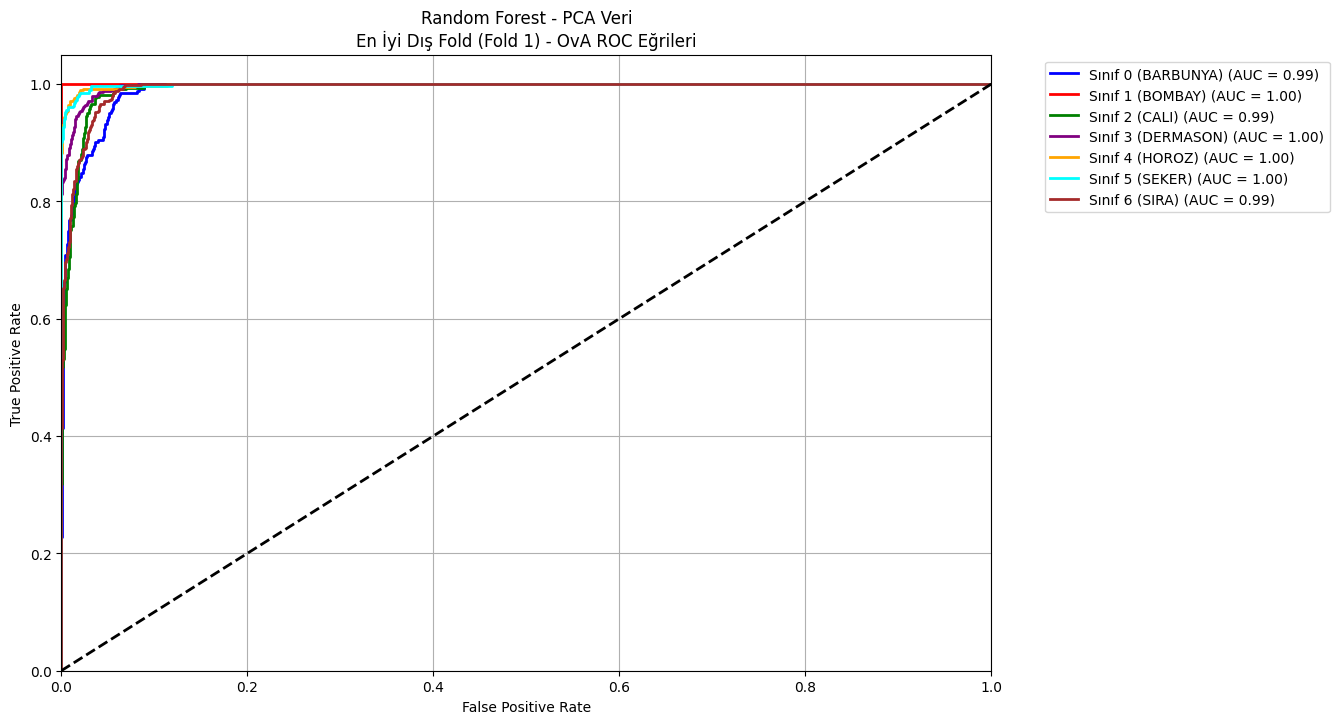


Random Forest (PCA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9903
BOMBAY: 1.0000
CALI: 0.9923
DERMASON: 0.9970
HOROZ: 0.9987
SEKER: 0.9987
SIRA: 0.9927
Macro Avg AUC: 0.9957


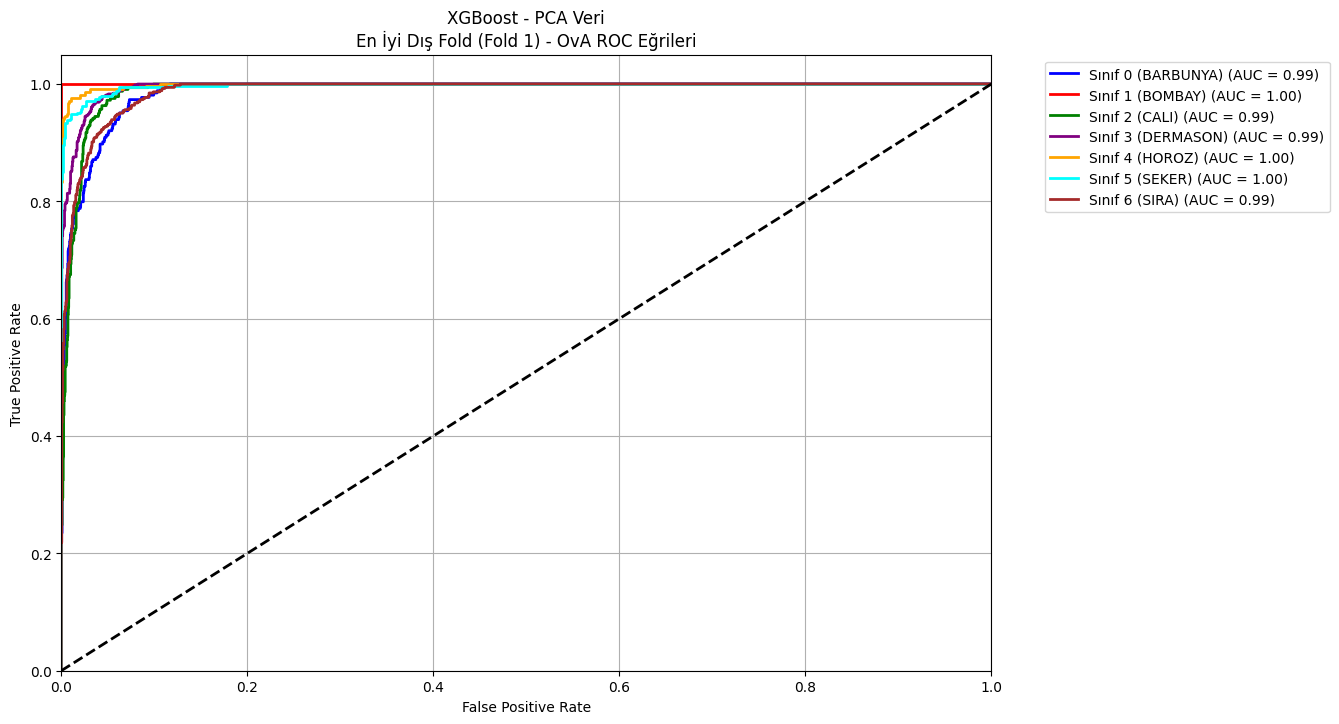


XGBoost (PCA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9872
BOMBAY: 1.0000
CALI: 0.9899
DERMASON: 0.9950
HOROZ: 0.9985
SEKER: 0.9972
SIRA: 0.9886
Macro Avg AUC: 0.9938


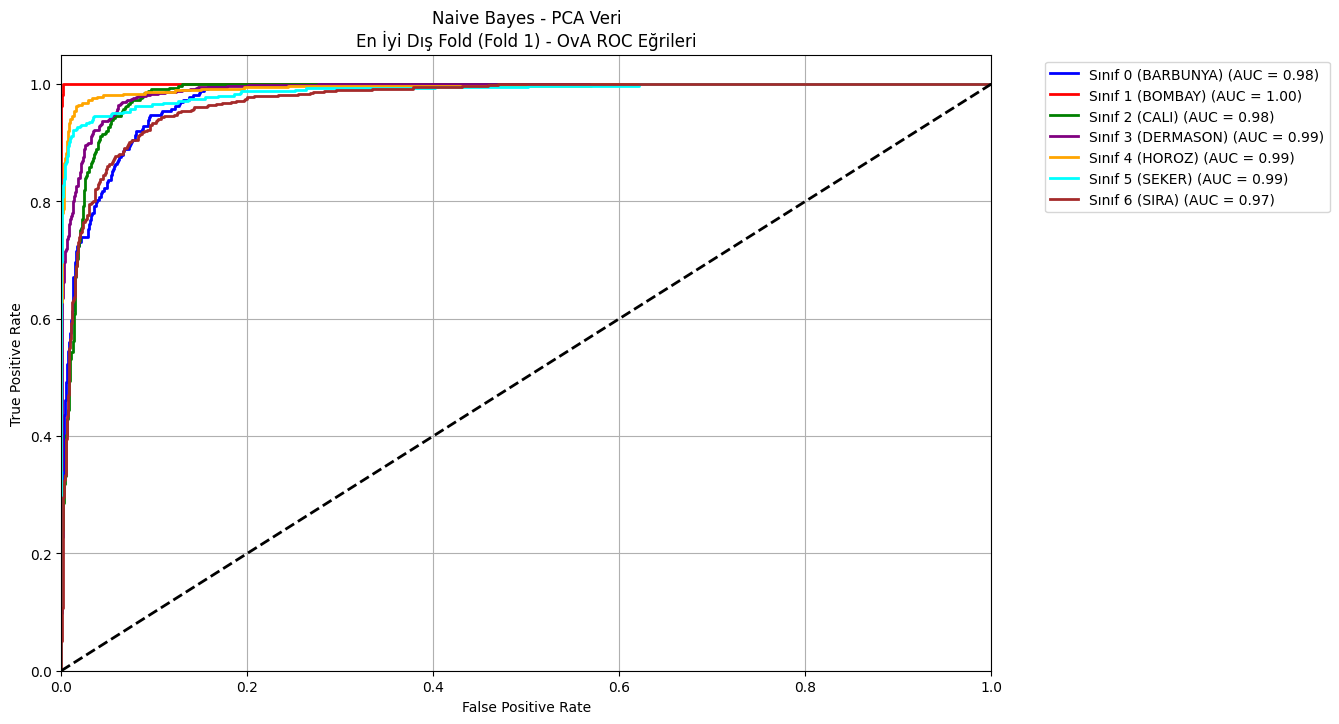


Naive Bayes (PCA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9775
BOMBAY: 0.9999
CALI: 0.9839
DERMASON: 0.9899
HOROZ: 0.9944
SEKER: 0.9887
SIRA: 0.9723
Macro Avg AUC: 0.9867


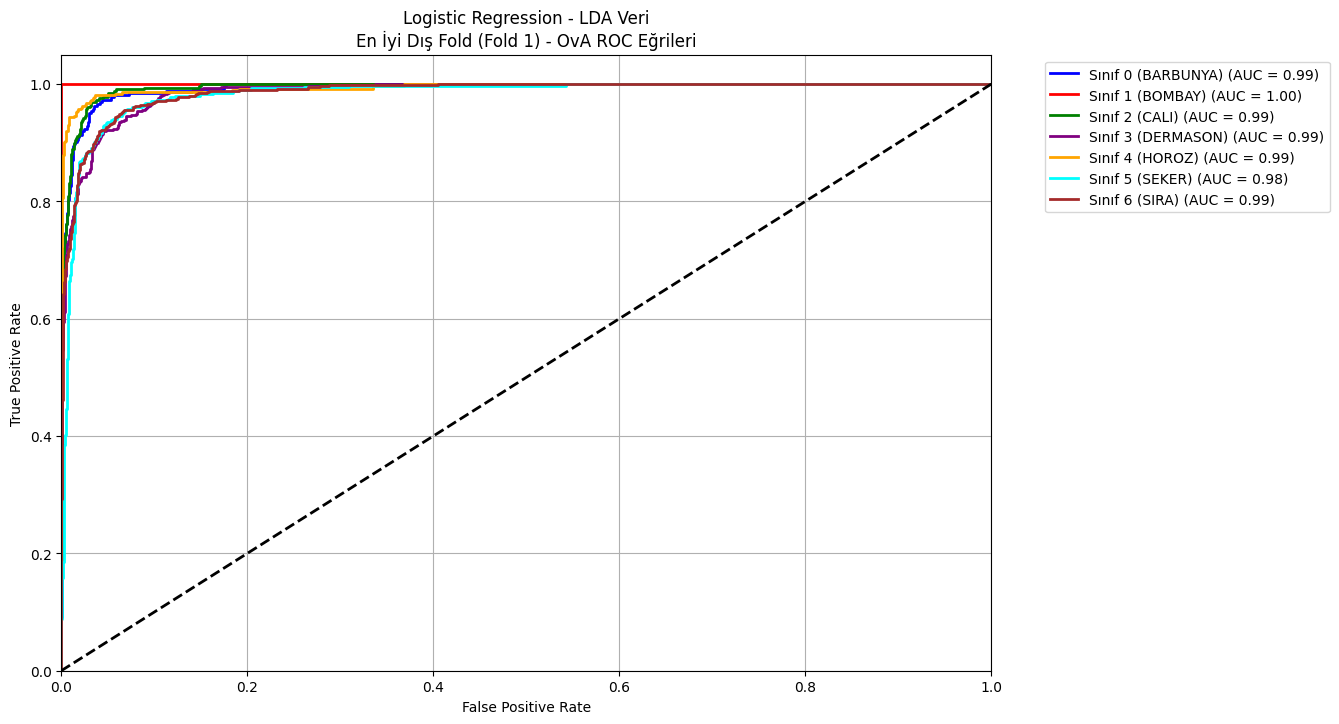


Logistic Regression (LDA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9927
BOMBAY: 1.0000
CALI: 0.9942
DERMASON: 0.9866
HOROZ: 0.9944
SEKER: 0.9835
SIRA: 0.9864
Macro Avg AUC: 0.9911


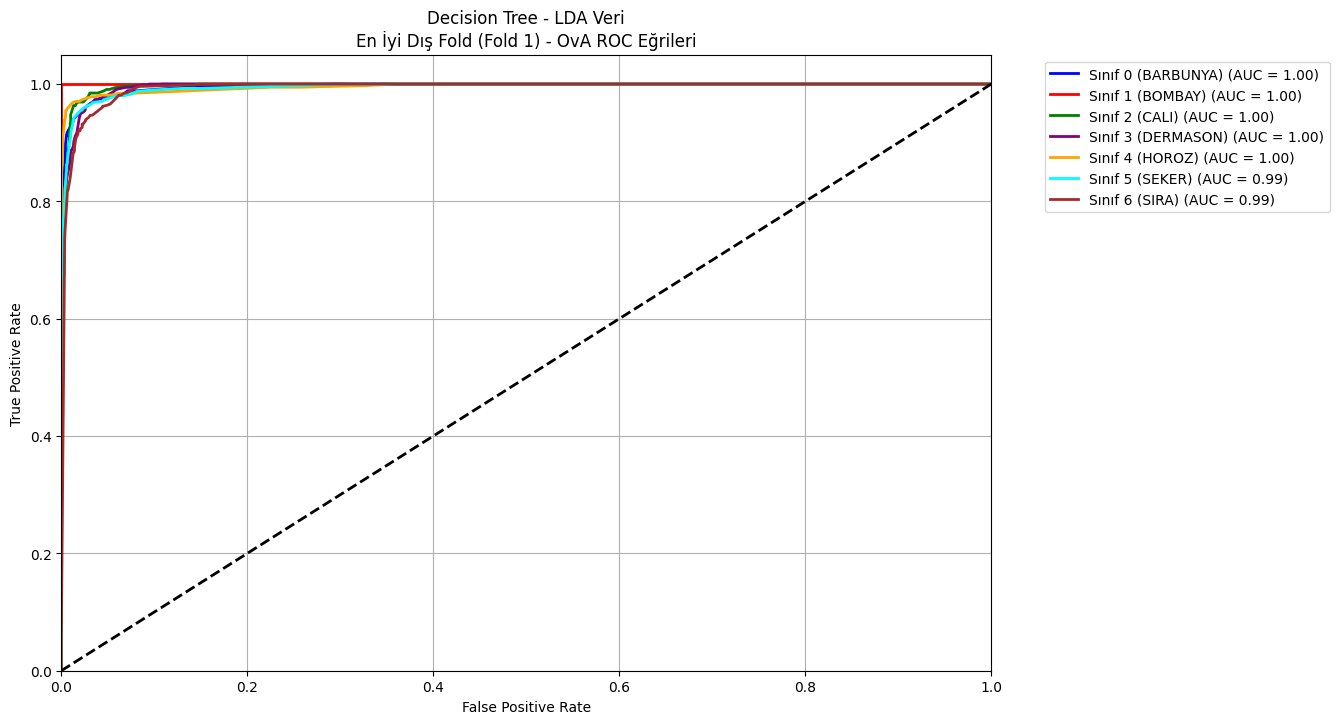


Decision Tree (LDA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9958
BOMBAY: 1.0000
CALI: 0.9965
DERMASON: 0.9959
HOROZ: 0.9958
SEKER: 0.9948
SIRA: 0.9932
Macro Avg AUC: 0.9960


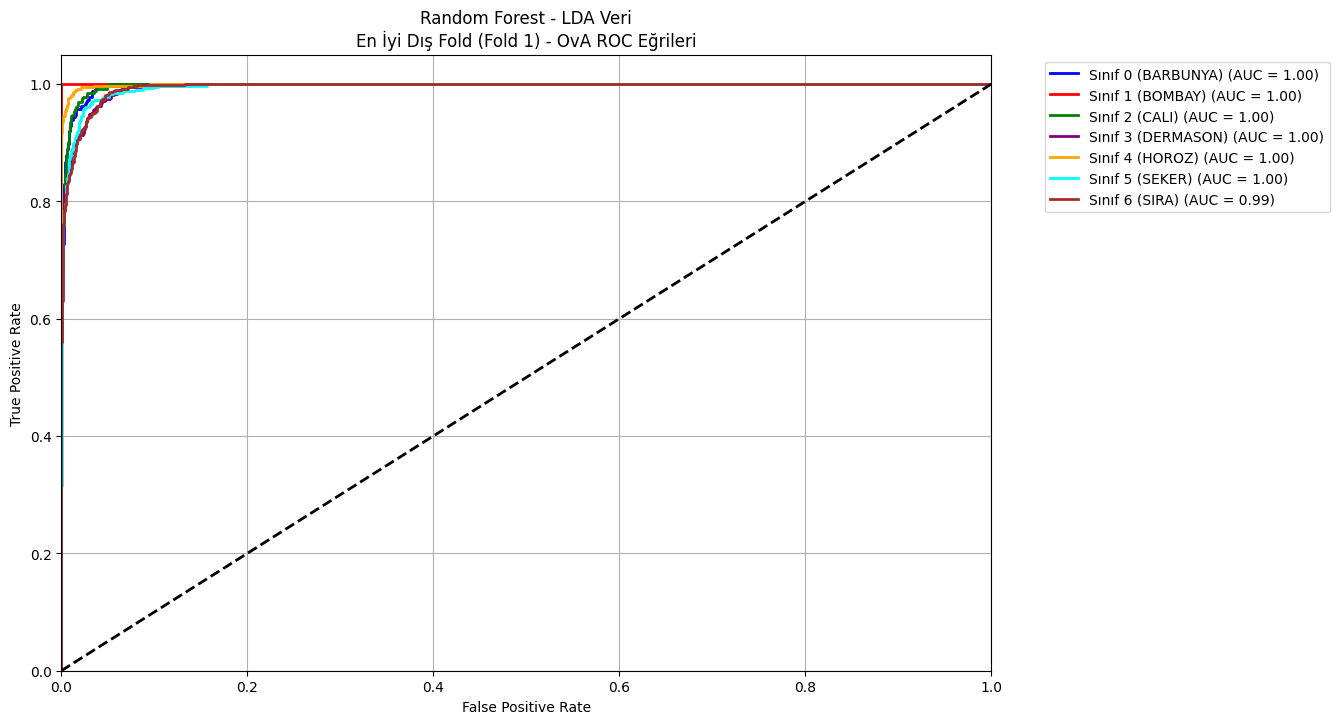


Random Forest (LDA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9972
BOMBAY: 1.0000
CALI: 0.9974
DERMASON: 0.9951
HOROZ: 0.9992
SEKER: 0.9951
SIRA: 0.9947
Macro Avg AUC: 0.9970


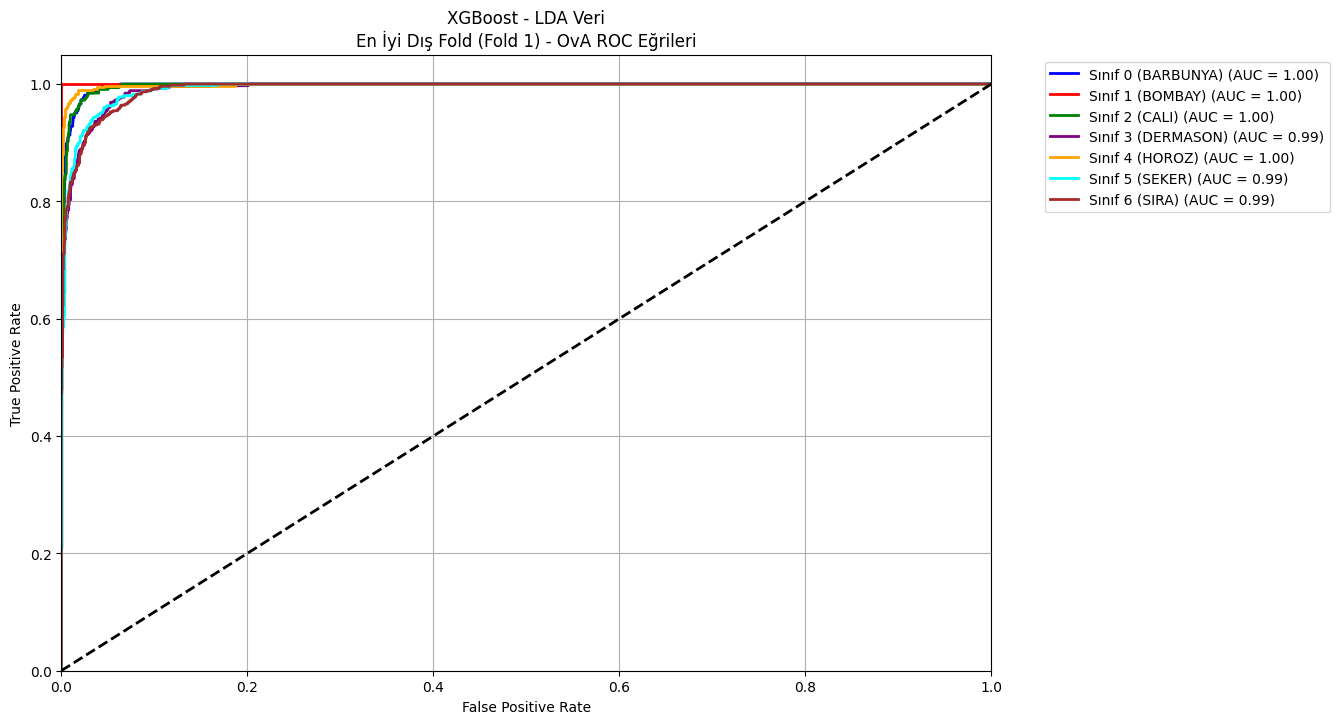


XGBoost (LDA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9973
BOMBAY: 1.0000
CALI: 0.9974
DERMASON: 0.9925
HOROZ: 0.9986
SEKER: 0.9924
SIRA: 0.9920
Macro Avg AUC: 0.9957


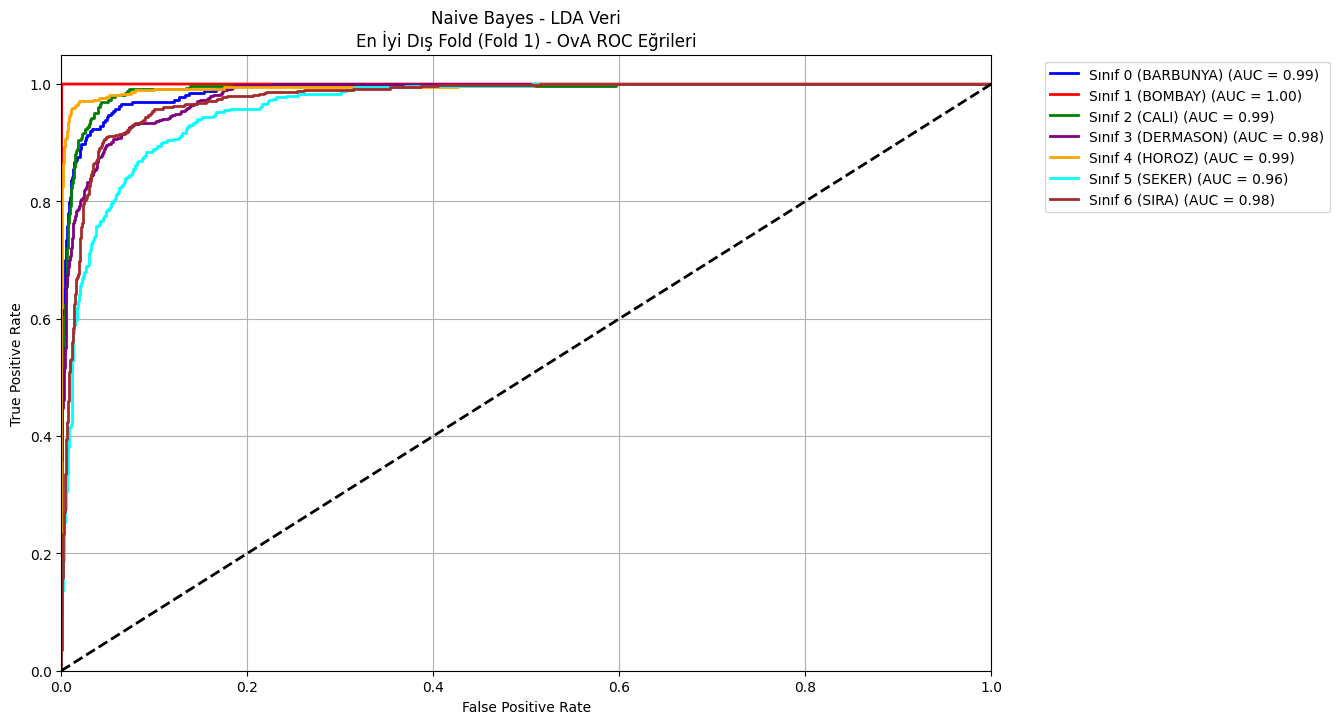


Naive Bayes (LDA Veri) - En ƒ∞yi Fold 1 AUC Skorlarƒ±:
BARBUNYA: 0.9897
BOMBAY: 0.9998
CALI: 0.9907
DERMASON: 0.9819
HOROZ: 0.9947
SEKER: 0.9627
SIRA: 0.9761
Macro Avg AUC: 0.9851


In [ ]:
def plot_ova_roc(X, y, best_model, data_name, model_name, class_names, outer_cv):

    # En iyi dƒ±≈ü fold'u bul (en y√ºksek accuracy'li)
    best_fold_idx = np.argmax([res['Accuracy'] for res in results if res['Data'] == data_name and res['Model'] == model_name])

    # Dƒ±≈ü fold'larƒ± yeniden olu≈ütur
    fold_generator = outer_cv.split(X, y)
    for fold, (train_idx, test_idx) in enumerate(fold_generator):
        if fold == best_fold_idx:
            X_test, y_test = X[test_idx], y[test_idx]
            break

    # OvA i√ßin gerekli ayarlar
    n_classes = len(class_names)
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    y_score = best_model.predict_proba(X_test)

    # ROC hesaplama
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # √áizim
    plt.figure(figsize=(12, 8))
    colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Sƒ±nƒ±f {0} ({1}) (AUC = {2:.2f})'.format(
                     i, class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - {data_name}\nEn ƒ∞yi Dƒ±≈ü Fold (Fold {best_fold_idx+1}) - OvA ROC Eƒürileri')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

    # AUC skorlarƒ±nƒ± yazdƒ±r
    print(f"\n{model_name} ({data_name}) - En ƒ∞yi Fold {best_fold_idx+1} AUC Skorlarƒ±:")
    for i in range(n_classes):
        print(f"{class_names[i]}: {roc_auc[i]:.4f}")
    print(f"Macro Avg AUC: {np.mean(list(roc_auc.values())):.4f}")

# Ana i≈ülem
for data_name in data_types.keys():
    for model_name in models_config.keys():
        # Nested CV sonu√ßlarƒ±ndan en iyi modeli al
        model_results = [res for res in results if res['Data'] == data_name and res['Model'] == model_name]
        if not model_results:
            continue

        # En iyi parametrelerle modeli yeniden olu≈ütur
        best_params = eval(model_results[0]['Best_Params'])
        model = models_config[model_name]["model"].set_params(**best_params)

        # T√ºm veriyi kullanarak fit et (veya nested CV'deki en iyi fold'un modelini kullan)
        model.fit(data_types[data_name], y_encoded)

        # ROC √ßiz
        plot_ova_roc(
            X=data_types[data_name],
            y=y_encoded,
            best_model=model,
            data_name=data_name,
            model_name=model_name,
            class_names=le.classes_,
            outer_cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        )